## **Programming for Data Science - Invloeden op de woningwaarde in de provincie Gelderland - Yama Anwari** ##

 *Een onderzoek naar invloeden die leiden tot een prijsstijging dan wel een prijsdaling van de gemiddelde woningwaarde per provincie.* 

## **Inhoudsopgave** ##

 - *Managementsamenvatting*
- 1 *Business Understanding*
- 2 *Data Understanding*
- 3 *Data Preparation*
- 4 *Modelling*
- 5 *Evaluation*
- 6 *Deployment*
-  *Literatuurlijst*
-  *Bijlagen*

## **Managementsamenvatting** ##
 
In dit onderzoek is gepoogd een antwoord te geven op de businessvraag: *‘’welke variabelen correleren het beste en zijn daarmee het meest effectief om maandelijks accuraat de hoogte van de gemiddelde woningwaarde in de provincie Gelderland te kunnen voorspellen middels een voorspelmodel?’’.* De aanleiding van deze vraag is dat het op dit moment een onbekend gegeven is welke variabelen dit zijn en in hoeverre ze gecorreleerd zijn met de gemiddelde woningwaarde. Om deze vraag te kunnen beantwoorden is er gebruik gemaakt van een vijftal datasets/ dataframes. Dit zijn onder meer: financieel risico hypotheekschuld, gemiddelde woningwaarde per provincie, de consumentenprijsindex (CPI) in %, de gemiddelde verkoopprijzen van woningen en het aantal verkochte woningen.

Uit het onderzoek is naar voren gekomen dat de onderzochte variabelen in vier categorieën kunnen worden onderverdeeld. De r-waarde onder de 0.10 wordt ‘klein’ genoemd, tussen 0.10 en 0.30 ‘klein tot gemiddeld’, tussen 0.30 en 0.50 ‘gemiddeld tot groot’ en boven de 0.50 ‘groot’. In dit onderzoek zijn enkel de grote correlaties opgenomen; gemiddelde waarde eigen woning (r :0.62), indexcijfers over verkoopontwikkeling (r : -0.60),Groningen (r :0.94), Friesland (r : 0.98), Limburg (r : 0.97), Zeeland (r : 0.66), Drenthe (r : 0.98), Overijssel (r : 0.95), Flevoland (r : 0.81), Zuid-Holland (r : 0.82), Noord-Brabant (r : 0.99) & Utrecht (r : 0.81). De gedachtegang hierbij is dat enkel de grote correlaties van grote invloed zullen zijn op de gemiddelde woningwaarde.


Deze groot correlerende variabelen zijn ook in een tweetal voorspelmodellen verwerkt om de gemiddelde maandelijkse woningwaarde te kunnen voorspellen. Het eerste model, de Random Forrest Regressor, voorspelt de maandelijkse waarden voor 68% accuraat. Het tweede model, de ARIMAX, voorspelt deze waarde voor 100% accuraat en is daarmee overfitted en niet betrouwbaar. Aan dit tweede moet nog verder worden gewerkt. Mogelijk zit er een lek in de data waardoor het trainmodel met de daadwerkelijke data wordt getraind. Hier moet naar gekeken worden.  

Het eerste model kan echter waarschijnlijk nog verder worden geoptimaliseerd om accuratere uitkomsten te krijgne. De gedachte hierbij is dat waarden nog nauwkeuriger kunnen worden voorspeld wanneer de outliers vervangen worden met de gemiddelde waarden en de gemiddeld tot laag correlerende variabelen ook worden meegenomen in het voorspelmodel. 

In [1]:
# De onderstaande packages moeten worden ingeladen / geinstaleerd middels pip install om de bewerkingen alsook de visualisaties te kunnen plotten. 

import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

## **1 Business Understanding** ##

In dit project wordt getracht een uitspraak te doen over de gemiddelde woningwaarde van de provincie Gelderland. Om dit mogelijk te maken is er gebruik gemaakt van verschillende datasets/ databronnen. Deze databronnen zijn steeds opgehaald en geprepareerd om verdere analyse op uit te voeren met als uiteindelijk doel om een voorspelmodel te ontwikkelen. Deze preparatiestappen worden in de komende hoofdstukken uitvoerig besproken. Daarnaast wordt na het lezen van dit rapport ook duidelijk hoe men tot een antwoord dan wel een conclusie is gekomen.

**1.1 Aanleiding**

De huizenmarkt is erg in beweging. Tegenwoordig is het kopen van een huis niet meer zo vanzelfsprekend voor iedereen, in het bijzonder voor starters is dit een erg lastige opgave geworden (Amstelveens Nieuwsblad, 2023). De huisprijs is namelijk afhankelijk van diverse factoren, te denken valt aan; beleggers die huizen opkopen en die vervolgens verhuren, het belastingvrije schikkingsbedrag die ouders aan hun kinderen overmaken, stikstofproblemen die de bouw van de huizen bemoeilijken, immigratiestroom vanuit Oekraïne en/of oorlogsgebieden. Al met al zijn er vele factoren die de huizenprijzen doen verhogen dan wel verlagen. Het doel van dit project is om inzicht te krijgen in deze factoren, of beter gezegd deze variabelen.

**1.2 De noodzaak van dit project**

Als starter merken wij, als een werkend stel, hoe lastig het wel niet is om een huis te kunnen bemachtigen/ kopen. De bovengenoemde variabelen spelen ook bij ons een rol. Hierdoor weten wij niet waar, maar belangrijker wanneer we een huis kunnen kopen. Onze verblijfplek is in Gelderland, waar we beiden zijn opgegroeid en hebben naast onze vrienden en familie ook ons werk hier. We zouden graag een huis in deze provincie willen kopen.
Echter, net als de rest van het land zijn de huizenprijzen ook in deze provincie sterk onderhevig aan prijsschommelingen en fluctuaties. Volgens het Kadaster is de gemiddelde vraagprijs € 511.251 (Kadasterdata, 2023). Het te lenen gemiddelde hypotheekbedrag lag in 2022 voor de provincie Gelderland nog op € 321.000 (Business Insider, 2022). Dit betekent dat een gemiddelde huiskoper, zoals wij, gemiddeld bijna € 200.000, - ofwel uit eigen inbreng (spaargeld, ouders, familie/vrienden) moet financieren ofwel een nog hoger hypotheekbedrag dient af te sluiten.
In ons geval is het eerste niet denkbaar. Wij hebben vorig jaar een mooi, maar vooral een dure bruiloft gehad en mijn ouders, vrienden en familie hebben eveneens dat geld niet. Het gevolg is dat we op dit moment noodgedwongen een huurhuis hebben en wachten op de 'goede tijd', hopende op een flinke prijscorrectie, om een huis te kunnen kopen.

Het voorspellen van die prijscorrectie en/of een gemiddelde woningwaarde in de provincie Gelderland is op dit moment, net als voor vele andere economen, een terra incognita. Dit wil zeggen: een geheel onbekend gegeven en het doen van een uitspraak daarover is en blijft tasten in het duister. Desondanks willen we weten in welk jaar en welke maand men het beste een huis kan kopen. Daarnaast willen we in kaart brengen op welke wijze het woningaanbod zich in de afgelopen jaren heeft ontwikkeld en hoe het er nu voor staat.

*Waarom is de gemiddelde woningwaarde per maand en per provincie zo belangrijk?* 
De gemiddelde woningwaarde is een veelzeggend gegeven. Dit cijfer komt onder andere door de gemiddelde verkoopprijs tot stand (RTL Z, 2023). De gemiddelde verkoopprijs komt vervolgens door het vraag en aanbod-principe tot stand. Het voorspellen of de gemiddelde woningwaarde per maand stijgt dan wel daalt, heeft logischerwijs ook consequenties voor het te lenen hypotheekbedrag. De verwachting is immers dat de verkoopprijs dan ook stijgt dan wel daalt. Om deze reden wordt de focus van dit onderzoek gelegd op het achterhalen van de betreffende variabelen, welke sterk gecorreleerd zijn met de gemiddelde woningwaarde. Dit is nodig om uiteindelijk accuraat te kunnen voorspellen.

Dit project heeft dus een tweeledige motivatie; enerzijds is het hartstikke interessant om een voorspelling over de gemiddelde woningwaarde te kunnen doen en anderzijds kunnen wij de resultaten van dit project hopelijk ook privé gebruiken. Op basis van deze kennis en inzichten worden we in staat gesteld om in het gesprek met een hypotheekadviseur een weloverwogen beslissing te nemen bij het kopen van een huis in de provincie Gelderland.

**1.3 Probleemstelling**

*Businessvraag:*

 *‘’Welke variabelen correleren het beste en zijn daarmee het meest effectief om maandelijks accuraat de hoogte van de gemiddelde woningwaarde in de provincie Gelderland te kunnen voorspellen middels een voorspelmodel?’’*



## **2 Data Understanding** ##

Om het hierboven genoemde businessvraagstuk te kunnen beantwoorden, is er gebruik gemaakt van verschillende databronnen. In deze databronnen, ook wel bekend als datasets, zijn tevens de verschillende variabelen in verwerkt. Deze variabelen zullen bij het bewerken van elke dataset kort worden toegelicht om de relevantie ervan kenbaar te maken.

**2.1 Onderzoeksmodel**

Hieronder is het onderzoeksmodel opgenomen om kenbaar te maken van welke databronnen, variabelen, preparatiehandelingen en voorspelmodellen er gebruik is gemaakt. Daarna worden de variabelen in kwestie toegelicht. Belangrijk om te weten is dat de data voor het minen van al deze variabelen enkel tot en met januari 2020 gaan. Er is bewust gekozen om de data na deze tijd voor het opstellen van het voorspelmodel buiten beschouwing te laten. De voornaamste reden is: het uitsluiten van COVID-19 effecten. Ongeveer in februari/maart waren de effecten van de coronapandemie zichtbaar, met als gevolg dat veel data vervuild/ vertroebeld is geraakt. Dit geldt ook voor de datasets, e.g., CPI, die gebruikt worden voor dit onderzoek. Om een zuiverdere voorspelling te kunnen maken, is alle data na deze periode voor dit onderzoek buiten beschouwing gelaten.

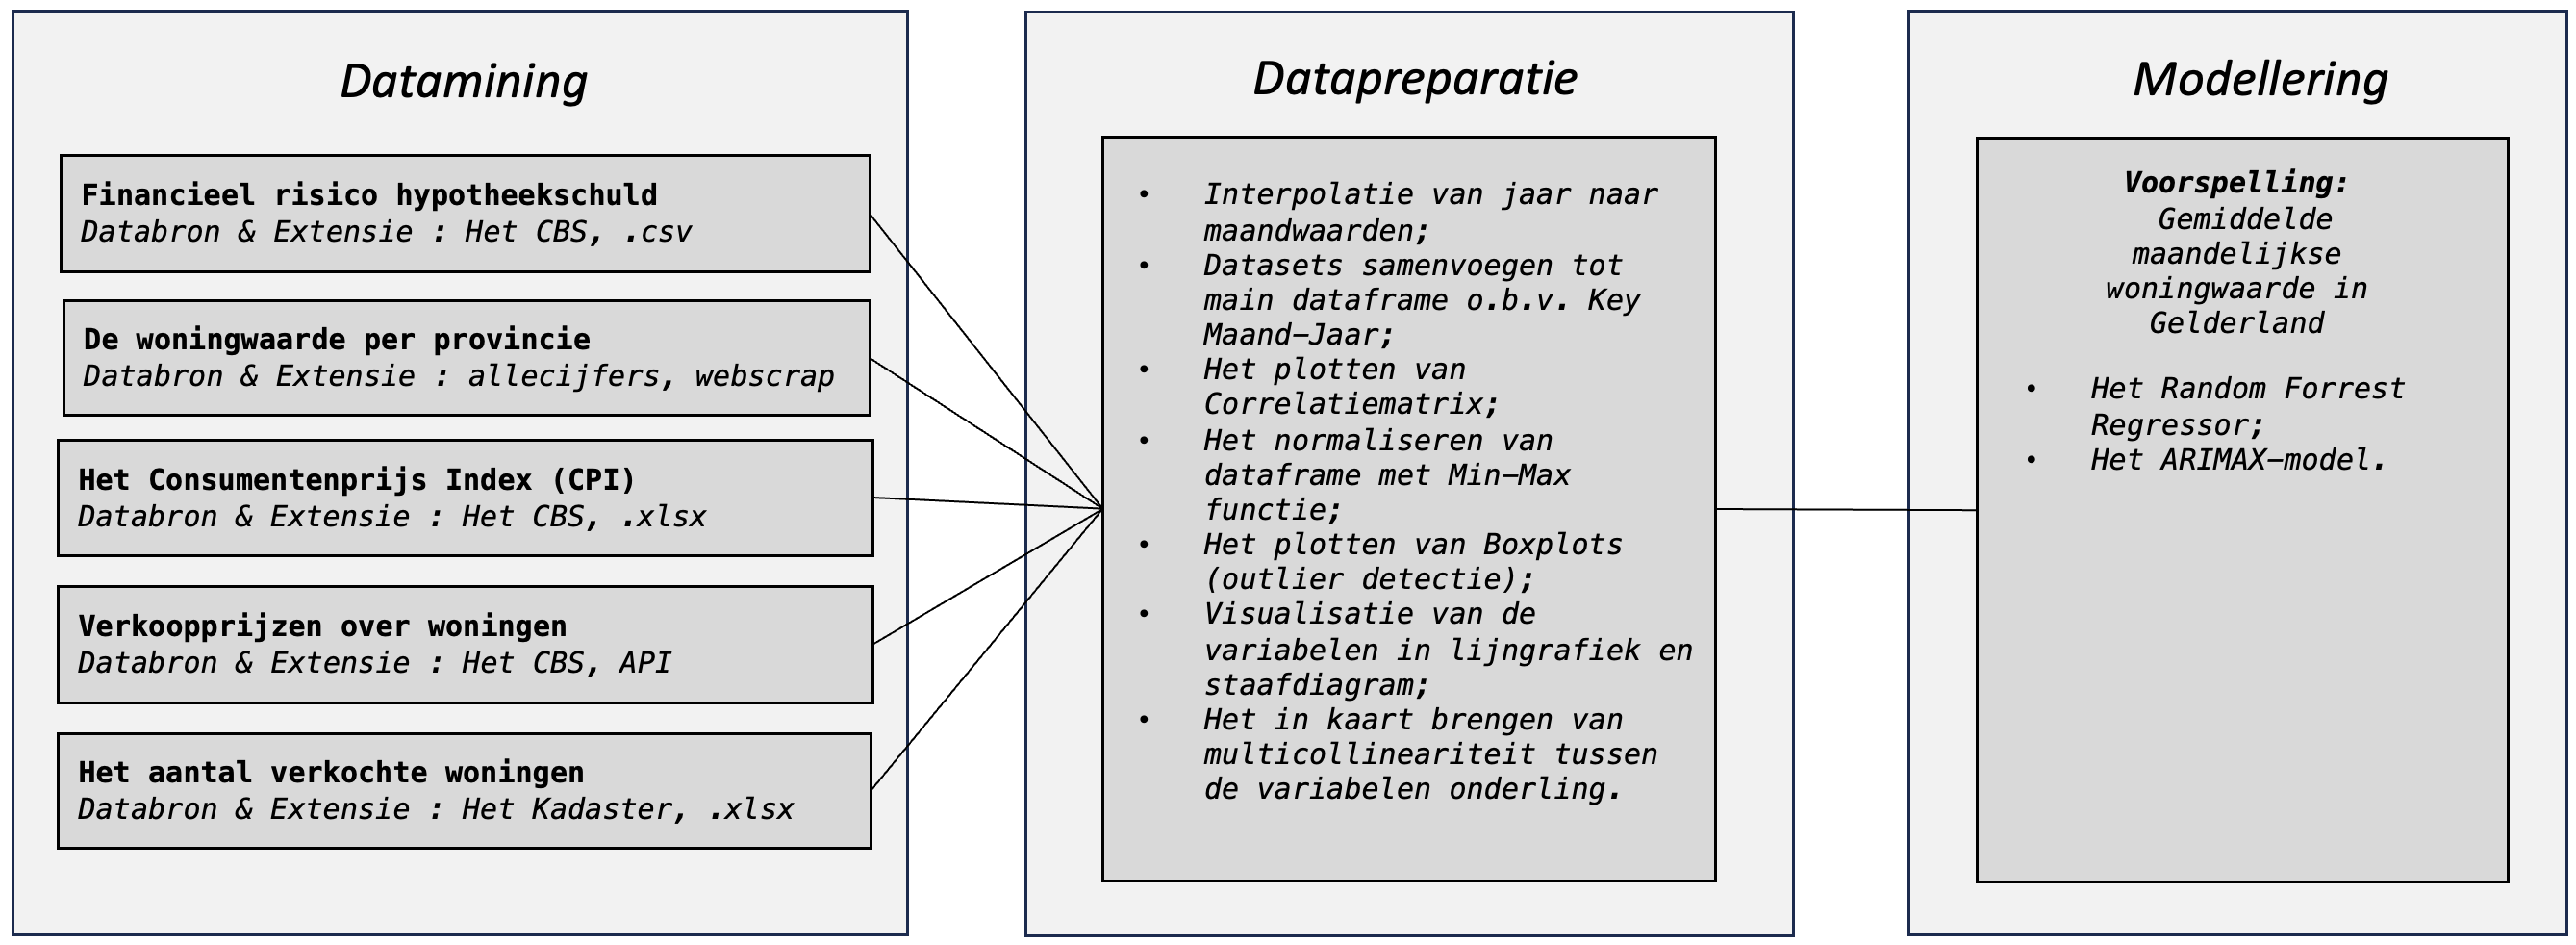

In [2]:
# Het weergeven van het onderzoeksmodel
# Het pad naar het PNG-bestand
bestand_pad = os.path.join('Datasets/Origineel/Het Onderzoekmodel.png')

# Controleren of het bestand bestaat
if os.path.exists(bestand_pad):
    # De afbeelding weergeven in de Markdown-cel
    display(Image(filename=bestand_pad))
else:
    print("Het PNG-bestand kan niet worden gevonden op het opgegeven pad.")

**2.2 Dataframes**

Hieronder worden de gebruikte datasets, hierna als dataframe benoemd, kort toegelicht:

- **Financieel_Risico_Hypotheekschuld:**

Dit dataframe heeft een .csv als extensie en is afkomstig uit het CBS (CBS, 2023). Dit dataframe bevat gegevens over het financieel risico van eigenwoningbezitters door hypotheekschuld, woningwaarde en inkomen aan elkaar te relateren.

- **Dataframe_Jaartallen_Maanden:**

Dit dataframe is aangemaakt middels een functie om de jaartallen en maanden in een dataframe te krijgen. Niet alle ingewonnen dataframes beschikken over maanden. Middels het gebruiken van deze functie kan er aan elke dataset een maand worden toegekend. Deze maand i.c.m. jaartal is van belang om een unieke Key te maken waarmee alle dataframes met elkaar tot main dataframe worden gemerged.

- **Woningwaarde_Per_Provincie:**

Deze HTML-dataset (webscrapping) bevat de gemiddelde woningwaarde per provincie in Nederland. De woningwaarde is gebaseerd op de gemiddelde WOZ-waarde in 2022.

- **De ConsumentenprijsIndex (CPI) in %:**

Deze dataset (.xlsx) bevat het indexcijfer dat het prijsverloop weergeeft van een pakket goederen en diensten zoals dit gemiddeld wordt aangeschaft door alle huishoudens in Nederland (Allecijfers, 2023).

- **De Verkoopprijzen over woningen:**

Deze dataset (API) bevat de gemiddelde verkoopprijs welke tot stand is gekomen door gebruik te maken van de koopakten die bij het Kadaster worden geregistreerd (CBS, 2023).

- **Het aantal verkochte woningen:**

Deze dataset (.xlsx) bevat het totaal aantal verkochte woningen per provincie per maand (Kadaster, 2023).

## **3 Data Preparation** ##

In dit hoofdstuk komt de datapreparatiestap aan bod. Deze stap is het meest tijdsintensieve en bewerkelijke stap binnen het CRISP-DM model. In hoofdstuk twee was te lezen welke variabelen uit de genoemde dataframes (datasets) gebruikt worden om de gestelde businessvraag te beantwoorden; het maandelijks kunnen voorspellen van de gemiddelde woningwaarde voor de provincie Gelderland. In dit hoofdstuk wordt elke dataframe, met inbegrip van de variabelen, kort toegelicht en daarna volgen de preparatiebewerkingen. De bewerkingen volgen vlak na de toelichting en zijn in Python script weergegeven.

**3.1 Financieel_Risico_Hypotheekschuld**

Dit csv-dataframe bevat gegevens over het financieel risico van eigenwoningbezitters door hypotheekschuld, woningwaarde en inkomen aan elkaar te relateren. De uitkomsten worden uitgesplitst naar kenmerken, zoals: samenstelling van het huishouden, leeftijd van de hoofdkostwinner, voornaamste inkomensbron, en inkomens- en vermogensgroepen. Uit dit dataframe wordt enkel de hypotheekschuld en woningwaarde gehaald.

De gedachtegang hierbij is dat wanneer de hypotheekschuld versus woningwaarde toeneemt, dit kengetal een negatieve impact zal hebben op de woningwaarde. Om een woning te kunnen kopen moeten kopers immers een hogere hypotheekschuld aangaan. Deze hoge schuld kan ervoor zorgen dat de kopers huiveriger worden met het aankopen van een huis waardoor er meer huisaanbod op de markt komt. Vanuit het vraag- en aanbodprincipe zou dit dus de gemiddelde woningwaarde kunnen doen verlagen. De gemiddelde woningwaarde komt immers ook door de gemiddelde verkoopprijs tot stand (RTL Z, 2013). In dit geval wordt dus enkel het eerste kengetal meegenomen. De data zijn op jaarniveau en loopt vanaf 2006 tot en met 2020. Onderstaande bewerkingen worden uitgevoerd en daarna worden de jaarcijfers naar maandwaarden geïnterpoleerd.


In [3]:

# Dataframe wordt van de locatie opgehaald en weergeven
Financieel_Risico_Hypotheekschuld = pd.read_csv("Datasets/Origineel/Financieel_risico_hypotheekschuld__eigenwoningbezitters_23052022_211613.csv", sep=";", on_bad_lines="skip")

# meerdere onnodige kolommen worden verwijderd
# Selecteren van meerdere rijen met iloc
Financieel_Risico_Hypotheekschuld = Financieel_Risico_Hypotheekschuld.iloc [:3]

# Draai het dataframe
# de dataframe wordt omgedraaid om het makkelijker te maken om mee te kunnen werken. 
Financieel_Risico_Hypotheekschuld = pd.melt(Financieel_Risico_Hypotheekschuld, id_vars=['Onderwerp', 'Perioden'], var_name='Jaartal', value_name='Waarde')

# de komma's worden vervangen door een punt om het om te kunnen zetten in een float.
Financieel_Risico_Hypotheekschuld['Waarde'] = Financieel_Risico_Hypotheekschuld['Waarde'].str.replace(',', '.')

# Er wordt een pivotable aangemaakt om de categorieeen te plaatsen.
Financieel_Risico_Hypotheekschuld = Financieel_Risico_Hypotheekschuld.pivot_table('Waarde', index = 'Jaartal', columns ='Onderwerp')

#de eerste rij wordt verwijderd
Financieel_Risico_Hypotheekschuld = Financieel_Risico_Hypotheekschuld.rename_axis(None, axis=0)

# Er wordt een nieuwe rij met jaartallen van 2006 tot en met 2020 aangemaakt
new_row = pd.DataFrame({'Jaartal': range(2006, 2021)})

# Er wordt een nieuwe rij aan het bestaande DataFrame toegevoegd.
Financieel_Risico_Hypotheekschuld = pd.concat([Financieel_Risico_Hypotheekschuld, new_row], ignore_index=True)

# Vul NaN-waarden in kolom 'Jaartal' op met jaartallen van 2006 tot en met 2020
start_year = 2006
end_year = 2020
years = range(start_year, end_year + 1)
Financieel_Risico_Hypotheekschuld['Jaartal'].fillna(pd.Series(years), inplace=True)

# Verwijder NaN-waarden uit het DataFrame
Financieel_Risico_Hypotheekschuld= Financieel_Risico_Hypotheekschuld.dropna()

# Verplaats kolom 'B' naar de eerste positie
Financieel_Risico_Hypotheekschuld.insert(0, 'Jaartal', Financieel_Risico_Hypotheekschuld.pop('Jaartal'))

# het punt op het einde van het jaartal alsook het type wordt omgezet naar een hele integer.
Financieel_Risico_Hypotheekschuld['Jaartal'] = Financieel_Risico_Hypotheekschuld['Jaartal'].round().astype(int)

**2.4 Dataframe Jaartal & Maanden**

Dit dataframe heeft als doel om aan een jaar een maand toe te kennen. Deze jaar/maandcombinatie is nodig om de waarden per maand te kunnen weergeven, maar belangrijker om de dataframes met elkaar te kunnen mergen. Er wordt een Key aangemaakt welke bestaat uit maand+jaar. Middels deze unieke Key kunen verschillende dataframes gemerged (samengevoegd) worden met elkaar.

In [4]:
# Dataframe met jaartallen en maanden
def create_year_month_dataframe():

#  Deze functie heeft als doel om tweetal kolommen aan te maken om per jaar de betreffende maand te vermelden. 
#   Deze twee kolommen zijn belangrijk om later de dataframes te kunnen mergen.

    years = list(range(2006, 2021))
    months = ['januari', 'februari', 'maart', 'april', 'mei', 'juni', 'juli', 'augustus', 'september', 'oktober', 'november', 'december']
    dates = []

    for year in years:
        for month in months:
            dates.append(f"{year} {month}")

    df = pd.DataFrame({'Datum': dates})
    return df

# Gebruik de functie om een DataFrame te maken
Jaartal_maand = create_year_month_dataframe()

# Splits het woord en het getal in aparte kolommen
Jaartal_maand[['Jaartal', 'Maand']] = Jaartal_maand['Datum'].str.split(n=1, expand=True)

# specifieke kolommen 'Jaartal' en 'Maand' worden met met loc geselecteerd
Jaartal_maand = Jaartal_maand.loc[:, ['Jaartal', 'Maand']]


**2.5 De woningwaarde per provincie**

Deze dataset bevat de gemiddelde woningwaarde per provincie. Er zijn 12 provincies in Nederland waarvoor de gegevens over de gemiddelde woningwaarde bekend zijn. Deze waarden zijn op jaarbasis gepubliceerd. Dit wil zeggen dat ook deze waarden naar maandniveau worden geïnterpoleerd. De gedachtegang hierbij is dat wanneer er verwachting is dat de gemiddelde woningwaarde gaat dalen, dit ook een negatieve impact op de verkoopprijs zal hebben. En wanneer de gemiddelde woningwaarde stijgt, dat dit de andere kant op werkt. In dat geval neemt de betaalbaarheid van een koopwoning toe dan wel af.

In [5]:

# Dataframe over woningwaarden

# URL van de pagina om te scrapen
url = "https://allecijfers.nl/ranglijst/gemiddelde-woningwaarde-per-provincie-in-nederland/"

# Stuur een GET verzoek naar de URL
response = requests.get(url)

# maak een  BeautifulSoup object om de HTML content te kunnen parsen
soup = BeautifulSoup(response.content, "html.parser")

# vind de tabel met de benodigde data
table = soup.find("table")

# Extract de tabel headers
headers = [th.text.strip() for th in table.find_all("th")]

# Extract de tabel rijen
data = []
for tr in table.find_all("tr"):
    row = [td.text.strip() for td in tr.find_all("td")]
    if row:
        data.append(row)

# Maak een DataFrame van de ge-extracte data
df = pd.DataFrame(data, columns=headers)

# Draai het dataframe om met behulp van transpose().
df_transposed = df.transpose()

# Bijwerk de kolomnamen met waarden van de tweede rij.
df_transposed.columns = df_transposed.iloc[0]

# Verwijder de eerste rij, deze rij bevat nu lege waarden. 
df_transposed = df_transposed.iloc[1:]

# Verander de kolomnaam 'Provincie' naar 'Jaartal'
df_transposed  = df_transposed .rename(columns={'Provincienaam': 'Jaartal'})

# Verwijder het euroteken uit alle rijen in het dataframe
df_transposed = df_transposed.applymap(lambda x: x.replace('€', ''))

# Verwijder het puntteken uit alle rijen in het dataframe
df_transposed = df_transposed.applymap(lambda x: x.replace('.', ''))

# Wijzig het datatype van alle kolommen naar integer
df_transposed = df_transposed.astype(int)

# Verwijder rijen met waarden tussen 1 en 12
df_transposed = df_transposed[~df_transposed.apply(lambda row: row.between(1, 12)).any(axis=1)]

# Voeg jaartallen toe aan de DataFrame
years = range(2022, 1996, -1)
df_transposed['Jaartal'] = years

# Kolomtype omzetten naar integer
df_transposed['Jaartal'] = df_transposed['Jaartal'].astype(int)

# Haal de gewenste kolom uit de DataFrame
Jaartal = df_transposed.pop('Jaartal')

# Voeg de gewenste kolom op de gewenste positie toe aan de DataFrame
df_transposed.insert(0, 'Jaartal', Jaartal)

# Sorteer de waarden in de kolom oplopend
df_sorted = df_transposed.sort_values('Jaartal')

Woningwaarde_Provincies = df_sorted

**2.6 Main Dataframe**

Dit vormt de main dataframe, dit wil zeggen dat wanneer alle andere dataframes met elkaar worden gemerged, dat het tot deze dataframe leidt. Deze dataframe wordt gebruikt om verdere analyses en bewerkingen op te doen. En elke nieuwe dataframe wordt middels de aangemaakt Key tot deze main dataframe gemerged.

In [6]:
# Main Dataframe
# Het samenvoegen van de twee dataframes: Jaartal_maand + Financieel_Risico_Hypotheekschuld

# Specifieke kolommen omzetten naar integers
Financieel_Risico_Hypotheekschuld['Jaartal'] = Financieel_Risico_Hypotheekschuld['Jaartal'].astype(int)
Woningwaarde_Provincies['Jaartal'] = Woningwaarde_Provincies['Jaartal'].astype(int)

# Merge uitvoeren op de aangepaste kolommen obv Key Jaartal
main_df_2 = pd.merge(Financieel_Risico_Hypotheekschuld, Woningwaarde_Provincies, on='Jaartal', validate='m:m')

# Specifieke kolommen omzetten naar integers
main_df_2['Jaartal'] = main_df_2['Jaartal'].astype(int)
Jaartal_maand['Jaartal'] = Jaartal_maand['Jaartal'].astype(int)

# Merge uitvoeren op de aangepaste kolommen obv Key Jaartal
main_df_2 = pd.merge(main_df_2, Jaartal_maand, on='Jaartal', validate='m:m')

# Specifieke kolommen omzetten naar integers
main_df_2['Jaartal'] = main_df_2['Jaartal'].astype(int)
Jaartal_maand['Jaartal'] = Jaartal_maand['Jaartal'].astype(int)

# Merge uitvoeren op de aangepaste kolommen obv Key Jaartal
main_df = pd.merge(Jaartal_maand, main_df_2, on='Jaartal', validate='m:m')

# Waarde van 'Kolom' omzetten naar integer
main_df['Jaartal'] = main_df['Jaartal'].astype(str)

# Nieuwe kolom aanmaken met waarden uit twee andere kolommen
main_df['Key'] = main_df['Jaartal'].astype(str) + main_df['Maand_x'].astype(str)

## Duplicaten verwijderen binnen kolom Key
main_df = main_df.drop_duplicates(subset='Key')


***2.6.1 Interpolatie jaarcijfers naar maandwaarden***

Zoals in het voorgaande hoofdstuk aangegeven, worden de jaarwaarden naar maandwaarden geïnterpoleerd om uiteindelijk op maandniveau te kunnen voorspellen. Hieronder de bewerkingen in code.

In [7]:

# Interpolatie van ontbrekende velden.

columns = ['Gemiddelde hypotheekschuld eigen woning', 'Particuliere huishoudens', 'Gemiddelde waarde eigen woning', 'Noord-Holland', 'Utrecht', 'Noord-Brabant', 'Zuid-Holland', 'Gelderland', 'Flevoland', 'Overijssel', 'Drenthe', 'Zeeland', 'Limburg', 'Friesland', 'Groningen']

# Samenvoegen van Jaartal en met alle kolommen met een scheidingsteken
# Het doel hiervan is om de dubbele waarden dan te kunnen verwijderen, op dit moment kan dat niet omdat eenzelfde waarde ook over andere jaren / perioden voor kan komen. 
# Hierdoor worden de waarden ook uit andere jaren verwijderd omdat ze als dubbel worden gezien. Door de waarde uit een kolom met het betreffende jaartal te combineren worden de waarden per jaar uniek.

# Stap 1: Concateneren van jaar en kolomwaarden
for column in columns:
    main_df[column] = main_df['Jaartal'].astype(str) + '-' + main_df[column].astype(str)

# Stap 2: Leegmaken van duplicaten
for column in columns:
    main_df.loc[main_df[column].duplicated(), column] = ''

# Stap 3: Dataframe voor interpolatie maken
main_df_before_interpolation = main_df.copy()

for column in columns:
    main_df_before_interpolation[column] = main_df[column].str.split('-').str[1]

# Rijen tot en met 172 verwijderen, dit vanwege het feit dat de waarde enkel tot en met januari 2020 gaat. 
# Op de resterende maanden kunnen niet worden geinterpoleerd. Omdat er geen data beschikbaar is.

# Stap 4: Rijen verwijderen en kolomtype wijzigen naar integer
main_df_before_interpolation = main_df_before_interpolation.iloc[:169, :]

# Stap 4: Rijen verwijderen en kolomtype wijzigen naar float

for column in columns:
    main_df_before_interpolation[column] = np.floor(pd.to_numeric(main_df_before_interpolation[column], errors='coerce')).astype('float').round(0)

# Stap 5: Interpolatie uitvoeren voor alle kolommen. 
main_df_after_interpolation = main_df_before_interpolation.copy()

for column in columns:
    main_df_after_interpolation[column] = main_df_before_interpolation[column].interpolate(method='cubic').round(0)


**2.7 De Consumentenprijs Index (CPI) in %**

De consumentenprijsindex (CPI) geeft de prijsontwikkeling weer van goederen en diensten die worden gekocht door huishoudens in Nederland. De prijzen van deze producten veranderen eigenlijk het hele jaar door. Sommige prijzen stijgen en sommige dalen. Hoe deze prijzen veranderen, wordt in de gaten gehouden door het Centraal Bureau voor Statistiek (CBS). Deze Nederlandse instantie berekent de consumentenprijsindex om zo de inflatie of deflatie in een jaar vast te stellen.

Het CBS publiceert maandelijks over de prijsontwikkeling van goederen en diensten die consumenten aanschaffen. De jaarmutatie van de consumentenprijsindex (CPI) is een belangrijke indicator voor de inflatie en wordt berekend als de procentuele verandering van de CPI in de verslagmaand ten opzichte van een jaar eerder (Centraal Bureau voor de Statistiek, 2023).

De gedachte bij het gebruik van dit xlsx-dataframe is dat wanneer het CPI toeneemt, dat dit een negatief effect zal hebben op de gemiddelde woningwaarde. De woning wordt immers minder waard vanwege de inflatie en hierdoor dienen de kopers een hoger bedrag te betalen. Tegelijkertijd daalt de koopkracht ook. Dit wil zeggen dat de kopers met hetzelfde geld een woning met minder waarde kunnen aanschaffen. De verwachting is dat het hoge dan wel lage CPI invloed zal hebben op de gemiddelde woningwaarde. De hoge CPI zal uiteindelijk ook een negatief effect op het verkochte aantal woningen hebben, welke eveneens de gemiddelde woningwaarde kan doen laten dalen.

In [8]:
# De file over CPI wordt opgehaald vanuit de locatie en wordt als dataframe opgeslagen. 
CBS_CPI = pd.read_excel("Datasets/Origineel/CBS_CPI.xlsx", sheet_name='Blad1')

# Woorden splitsen in aparte kolommen
CBS_CPI[['Jaartal', 'Maand']] = CBS_CPI['Jaartallen'].str.split(' ', n=1, expand=True)

# Selecteer kolommen 'A' en 'C'
CBS_CPI = CBS_CPI[['Jaartallen', 'CPI_%', 'Jaartal', 'Maand']]

# Nieuwe kolom aanmaken met waarden uit twee andere kolommen
CBS_CPI['Key'] = CBS_CPI['Jaartal'].astype(str) + CBS_CPI['Maand'].astype(str)

column_name = 'Key'  # De naam van de kolom die je wilt verplaatsen
CBS_CPI[column_name] = CBS_CPI.pop(column_name)

# Merge uitvoeren op de aangepaste kolommen obv Key Jaartal
main_df_after_merged = pd.merge(main_df_after_interpolation, CBS_CPI, on='Key', validate='m:m')

# dubbele kolommen worden verwijderd
columns_to_remove = ['Maand_x', 'Jaartal_y']  # Namen van de kolommen die als gevolg van mergen dubbel voorkomen in de dataframe.
main_df_after_merged = main_df_after_merged.drop(columns_to_remove, axis=1)

column_name = 'Key'  # De Kolom Key wordt naar laatste plek verschoven 
main_df_after_merged[column_name] = main_df_after_merged.pop(column_name)


**2.8 De verkoopprijzen over woningen**

Het CBS en het Kadaster meten de prijsontwikkeling van alle bestaande koopwoningen in Nederland en maken gebruik van de koopakten die bij het Kadaster worden geregistreerd. Bij het gebruik van dit API-dataframe is de gedachtegang dat wanneer de gemiddelde verkooprijzen dalen, dit eveneens een negatief effect zal hebben op de woningwaarde.

In [9]:
# De URL van de CBS Open Data API
url = 'https://opendata.cbs.nl/ODataApi/odata/83906NED/TypedDataSet'

# Een GET-verzoek naar de API
response = requests.get(url)

# Controleer de status van het antwoord
if response.status_code == 200:
    # Haal de gegevens op in JSON-indeling
    data = response.json()
    
    # Converteer de gegevens naar een DataFrame
    df = pd.DataFrame(data['value'])
    
else:
    print('Fout bij het ophalen van de gegevens. Statuscode:', response.status_code)

# Enkel de onderstaande kolommen lijken interessant om mee te nemen in de dataframe. 
API_CBS_Verkoopprijzen = df.loc[:, ['Perioden', 'OntwikkelingTOVEenJaarEerder_6', 'AantalVerkochteWoningen_4', 'GemiddeldeVerkoopprijs_7', 'TotaleWaardeVerkoopprijzen_8']]

# Er worden alleen de jaren met maanden overgelaten en de overige waarden uitgehaald. Dit omdat de andere Dataframe's ook over deze waarden beschikken. 
API_CBS_Verkoopprijzen = API_CBS_Verkoopprijzen[API_CBS_Verkoopprijzen['Perioden'].str.len() > 4] # eerst wordt een selectie gemaakt om alle jaartallen eruit te halen, dus waarden boven 4.
API_CBS_Verkoopprijzen = API_CBS_Verkoopprijzen[API_CBS_Verkoopprijzen['Perioden'].str.len() < 16] # dan wordt er een selectie gemaakt om de jaartallen met kwartalen uit te halen.

#Verwijder rijen waarin "KW" voorkomt in de kolom 'Perioden', dit zijn de kwartaalcijfers
API_CBS_Verkoopprijzen = API_CBS_Verkoopprijzen[~API_CBS_Verkoopprijzen['Perioden'].str.contains('KW')]

#Verwijder rijen waarin "JJ" voorkomt in de kolom 'Perioden', dit zijn de totale jaarcijfers
API_CBS_Verkoopprijzen = API_CBS_Verkoopprijzen[~API_CBS_Verkoopprijzen['Perioden'].str.contains('JJ')]

# Split 'Perioden' in 'Jaartal' en 'Maandnummer'
API_CBS_Verkoopprijzen[['Jaartal', 'Maandnummer']] = API_CBS_Verkoopprijzen['Perioden'].str.extract('MM(\d{4})(\d{2})', expand=True)

# Split 'Perioden' in 'Jaartal' en 'Maandnummer'
API_CBS_Verkoopprijzen['Jaartal'] = API_CBS_Verkoopprijzen['Perioden'].str.extract('(\d{4})', expand=False)
API_CBS_Verkoopprijzen['Maandnummer'] = API_CBS_Verkoopprijzen['Perioden'].str.extract('MM(\d{2})', expand=False)

# Bepaal het maximale aantal rijen op basis van de index
max_rows = df.index.max()

# De dataframe heeft geen maanden, enkel de nummering ervan. Daarom wordt de onderstaande DF gemaakt.
# Lijst van maanden
maanden = ['januari', 'februari', 'maart', 'april', 'mei', 'juni', 'juli', 'augustus', 'september', 'oktober', 'november', 'december']

# Voeg een nieuwe kolom 'Maand' toe en vul deze met de maanden
API_CBS_Verkoopprijzen['Maand'] = pd.Series([maanden[(i - 1) % 12] for i in range(1, max_rows + 1)])

# Split 'Perioden' in 'Jaartal' en 'Maandnummer' om het vervolgens te kunnen mappen. 
API_CBS_Verkoopprijzen[['Jaartal', 'Maandnummer']] = API_CBS_Verkoopprijzen['Perioden'].str.extract('MM(\d{4})(\d{2})', expand=True)

# Split 'Perioden' in 'Jaartal' en 'Maandnummer'
API_CBS_Verkoopprijzen['Jaartal'] = API_CBS_Verkoopprijzen['Perioden'].str.extract('(\d{4})', expand=False)
API_CBS_Verkoopprijzen['Maandnummer'] = API_CBS_Verkoopprijzen['Perioden'].str.extract('MM(\d{2})', expand=False)

# Maandnummers naar maandnamen mappen
maandnamen = {
    '01': 'januari',
    '02': 'februari',
    '03': 'maart',
    '04': 'april',
    '05': 'mei',
    '06': 'juni',
    '07': 'juli',
    '08': 'augustus',
    '09': 'september',
    '10': 'oktober',
    '11': 'november',
    '12': 'december'
}
API_CBS_Verkoopprijzen['Maand'] = API_CBS_Verkoopprijzen['Maandnummer'].map(maandnamen)

# Key-kolom aanmaken met waarden uit twee andere kolommen, om de df later te kunnen mergen met main df.
API_CBS_Verkoopprijzen['Key'] = API_CBS_Verkoopprijzen['Jaartal'].astype(str) + API_CBS_Verkoopprijzen['Maand'].astype(str)

# De ondertaande kolomnamen worden aangepast om het werken en begrip gemakkelijker te maken.
new_column_names = {
    'OntwikkelingTOVEenJaarEerder_6': 'Indexcijfers_Over_Verkoopontwikkeling',
    'AantalVerkochteWoningen_4': 'Aantal_Verkochte_Woningen',
    'GemiddeldeVerkoopprijs_7': 'Gemiddelde_Verkoopprijs',
    'TotaleWaardeVerkoopprijzen_8': 'Totale_Waarde_Verkoopprijzen'
}
API_CBS_Verkoopprijzen = API_CBS_Verkoopprijzen.rename(columns=new_column_names)

column_name = 'Key'  # De naam van de kolom die je wilt verplaatsen
API_CBS_Verkoopprijzen[column_name] = API_CBS_Verkoopprijzen.pop(column_name)

# Merge uitvoeren op de aangepaste kolommen obv aangemaakte Key Jaartal en Maand
main_df_after_merged = pd.merge(main_df_after_merged, API_CBS_Verkoopprijzen, on='Key', validate='m:m')

column_name = 'Key' # De Kolom Key wordt naar laatste plek verschoven 
main_df_after_merged[column_name] = main_df_after_merged.pop(column_name)

**2.9 Het aantal verkochte woningen**

Dit .xlsx dataframe is afkomstig vanuit het Kadaster en bevat het aantal verkochten woningen per jaar, kwartaal en maand (Kadaster, 2023). Het minen van deze dataset is van belang om uiteindelijk in kaart te kunnen brengen in hoeverre het aantal verkochte woningen een positief dan wel een negatief effect hebben op de gemiddelde woningwaarde in de provincie Gelderland. De gedachtegang hierbij is dat wanneer er minder huizen gekocht worden en dat de woningwaarde zal gaan dalen. Wanneer er meer huizen worden verkocht, gaat het juist de andere kant op. Het vraag- en aanbodprincipe zou dan gaan gelden.
Hieronder de variabelen die deel uitmaken van de dataset.
-   Perioden: Dit zijn de samengevoegde jaar & maandcijfers van het aantal verkochten woningen.
-   Periode (maand): Dit zijn de maandcijfers per jaar van het aantal verkochten woningen.
-   Totaal: dit zijn de totale cijfers van alle kolommen.
-   De onderstaande variabelen spreken voor zich:
    -   2-onder-1-kap
    -   Appartement
    -   Hoekwoning
    -   Onbekend
    -   Tussenwoning
    -   Vrijstaand

In [10]:
# Type Verkochte Woningen
# De file wordt opgehaald vanuit de locatie. 
Totaal_Aantal_Verkochte_Woningen = pd.read_excel("Datasets/Origineel/Kadaster_Aantal+geregistreerde+verkochte+woningen.xlsx", sheet_name='Aantal woningen')

# Nu worden de jaartallen en Maanden val elkaar gesplitst om deze data vervolgens met de andere dataframe te kunnen mergen.
Totaal_Aantal_Verkochte_Woningen[['Maand','Jaartallen']]= Totaal_Aantal_Verkochte_Woningen.Perioden.str.split(' ',expand=True)

# Key-kolom aanmaken met waarden uit twee andere kolommen
Totaal_Aantal_Verkochte_Woningen['Key'] = Totaal_Aantal_Verkochte_Woningen['Jaartallen'].astype(str) + Totaal_Aantal_Verkochte_Woningen['Maand'].astype(str)

# Merge uitvoeren op de aangepaste kolommen obv Key Jaartal
main_df_after_merged = pd.merge(main_df_after_merged, Totaal_Aantal_Verkochte_Woningen, on='Key', validate='m:m')

# dubbele of onnodige kolommen worden verwijderd
columns_to_remove = ['Totaal', 'Onbekend', 'Jaartallen_y','Perioden_y', 'Maandnummer', 'Maand_y', 'Maand_x', 'Jaartallen_x', 'Jaartal_x', 'Perioden_x', 'Totale_Waarde_Verkoopprijzen']  # Namen van de kolommen die als gevolg van mergen dubbel voorkomen in de dataframe.

main_df_after_merged = main_df_after_merged.drop(columns_to_remove, axis=1)

column_name = 'Key'  # De Kolom Key wordt naar laatste plek verschoven 
main_df_after_merged[column_name] = main_df_after_merged.pop(column_name)

In [11]:
# impressie van de main_dataframe

# Plot de eerste 5 rijen van het dataframe als tabel
table = main_df_after_merged.head(5).style

# Weergeef de tabel
table

,Gemiddelde hypotheekschuld eigen woning,Gemiddelde waarde eigen woning,Particuliere huishoudens,Noord-Holland,Utrecht,Noord-Brabant,Zuid-Holland,Gelderland,Flevoland,Overijssel,Drenthe,Zeeland,Limburg,Friesland,Groningen,CPI_%,Indexcijfers_Over_Verkoopontwikkeling,Aantal_Verkochte_Woningen,Gemiddelde_Verkoopprijs,Jaartal,Periode (maand),2-onder-1-kap,Appartement,Hoekwoning,Tussenwoning,Vrijstaand,Maand,Key
0,128.000000,274.000000,3764.000000,221000.000000,232000.000000,226000.000000,187000.000000,220000.000000,180000.000000,186000.000000,177000.000000,159000.000000,179000.000000,159000.000000,141000.000000,1.300000,18.900000,13671,228008,2006,200601,1311,3719,1632,4704,1377,januari,2006januari
1,128.000000,275.000000,3773.000000,220843.000000,233059.000000,227577.000000,188291.000000,221175.000000,181005.000000,187140.000000,178403.000000,161172.000000,180600.000000,160522.000000,142088.000000,1.100000,12.400000,15698,229291,2006,200602,1575,4127,2005,5422,1558,februari,2006februari
2,129.000000,277.000000,3781.000000,220886.000000,234203.000000,229165.000000,189600.000000,222395.000000,181996.000000,188315.000000,179798.000000,163283.000000,182130.000000,162050.000000,143265.000000,1.000000,15.200000,18150,231013,2006,200603,1861,4815,2161,6310,1840,maart,2006maart
3,130.000000,278.000000,3789.000000,221119.000000,235425.000000,230761.000000,190922.000000,223654.000000,182972.000000,189520.000000,181182.000000,165333.000000,183592.000000,163581.000000,144522.000000,1.200000,-2.500000,16245,232932,2006,200604,1664,4269,1957,5603,1672,april,2006april
4,130.000000,280.000000,3796.000000,221532.000000,236719.000000,232361.000000,192256.000000,224948.000000,183933.000000,190751.000000,182554.000000,167321.000000,184988.000000,165113.000000,145850.000000,1.200000,9.300000,18479,232135,2006,200605,1949,4883,2280,6340,1859,mei,2006mei


## **3 Resultaten** ##

In dit hoofdstuk worden de resultaten weergeven en besproken. De resultaten hebben betrekking op de eerder samengestelde dataframes uit hoofdstuk twee. In dit hoofdstuk komen de onderstaande analyses aan bod.

- *De interpolatie*
- *Correlatiematrix*
- *Variance Inflation Factor (VIF)*
- *Normalisering van de waarden*
- *Het identificeren van de outliers*

**3.1 Interpolatie van Jaar naar Maandwaarden**

In de hieronder weergeven grafiek is te zien op welke wijze de maandelijkse interpolatie zich verhoudt tot de daadwerkelijke jaarwaarden. Zoals uit de grafieken hieronder opvalt, lopen de geïnterpoleerde waarden over de jaarwaarden heen. Dat wil zeggen dat de interpolatie logisch en correct is verlopen.

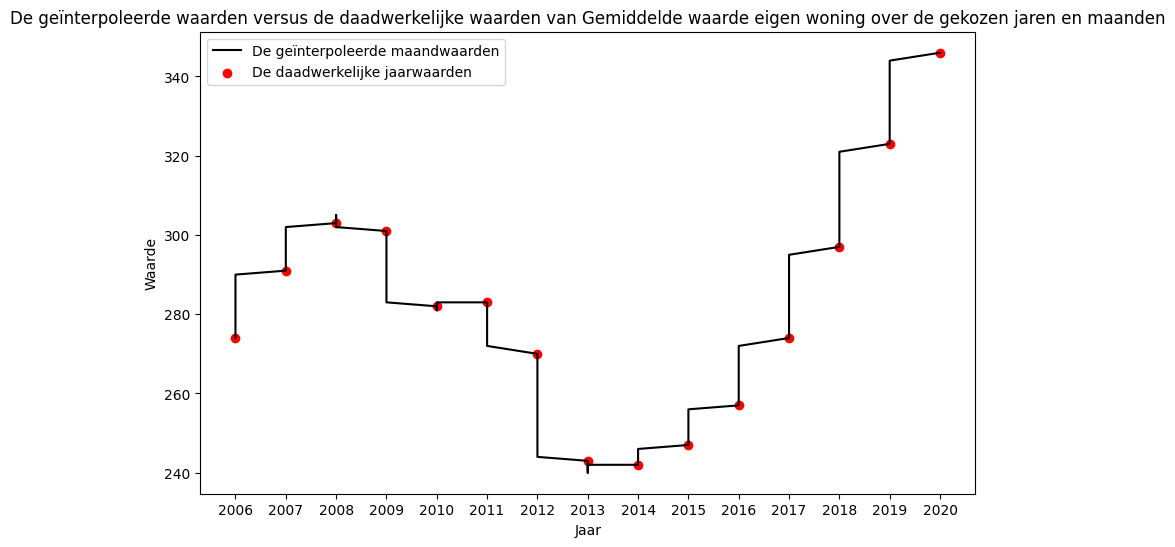

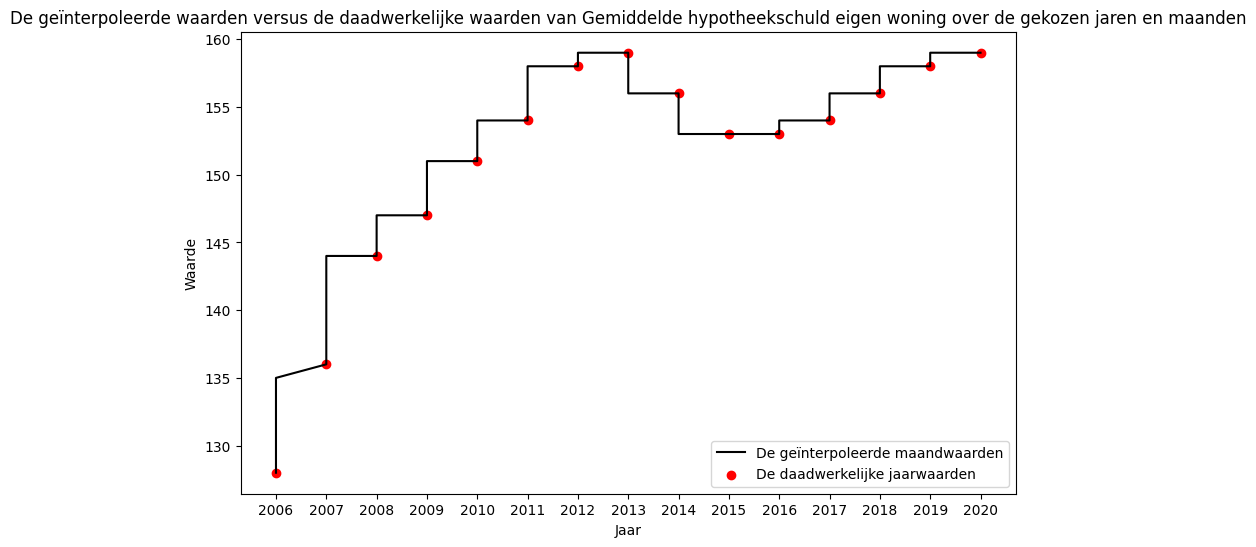

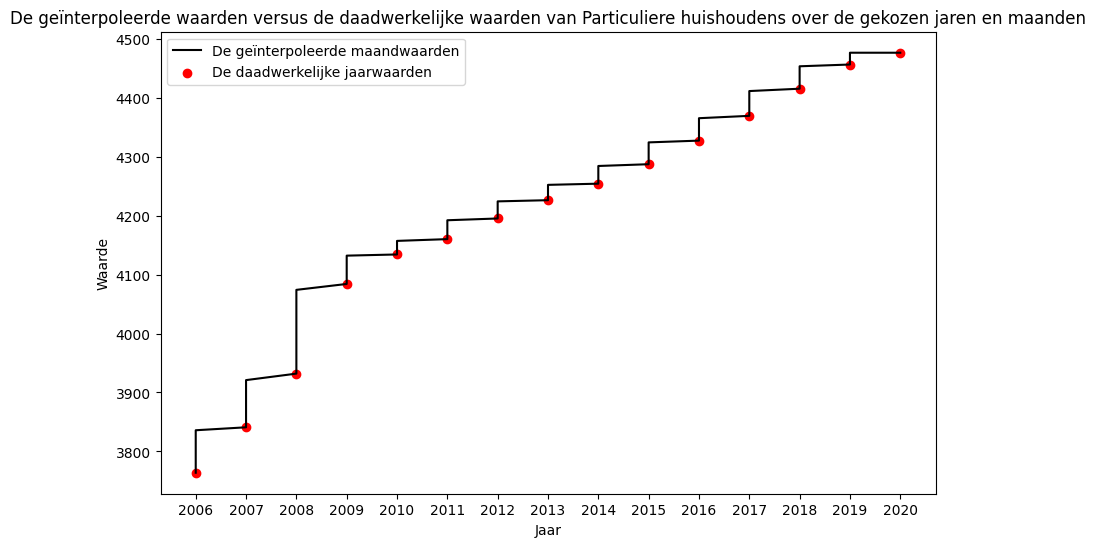

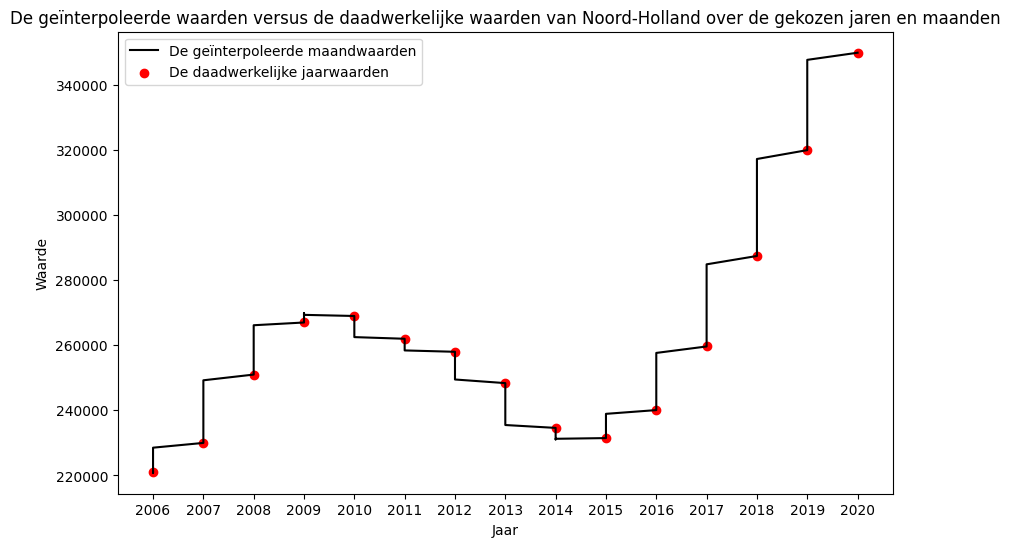

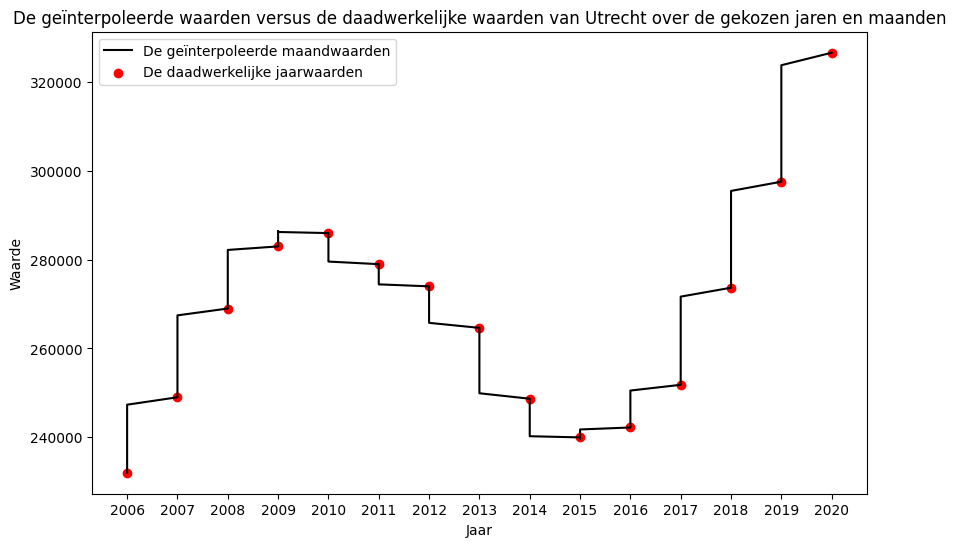

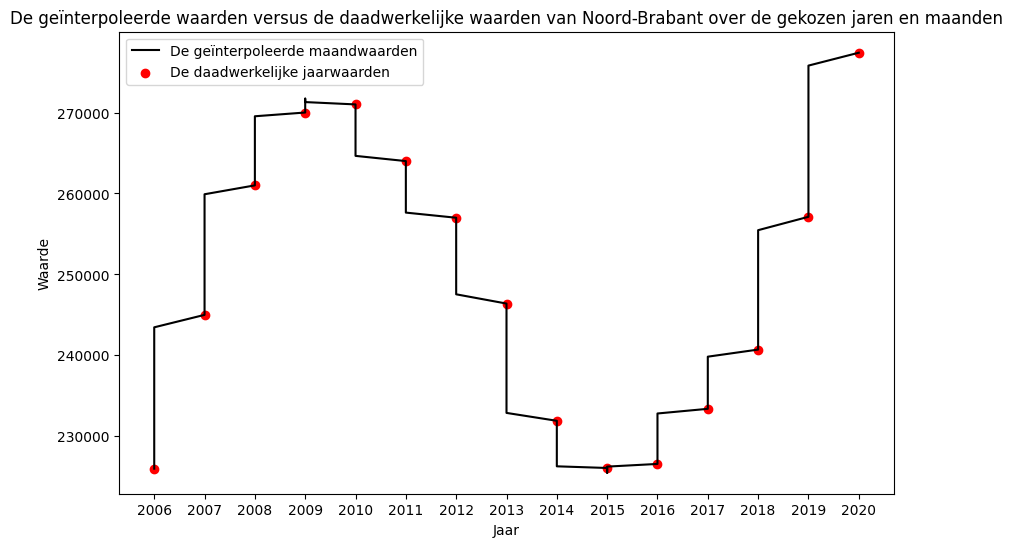

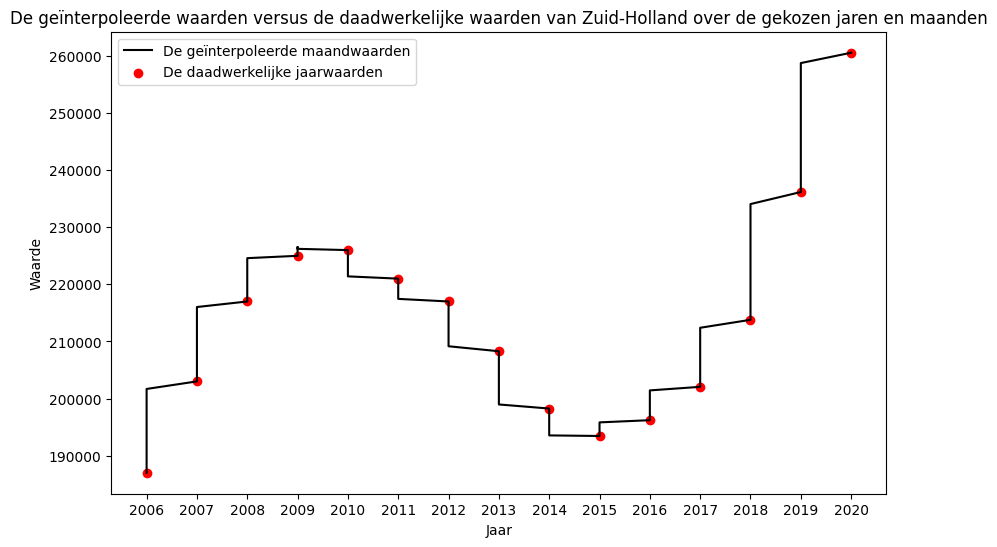

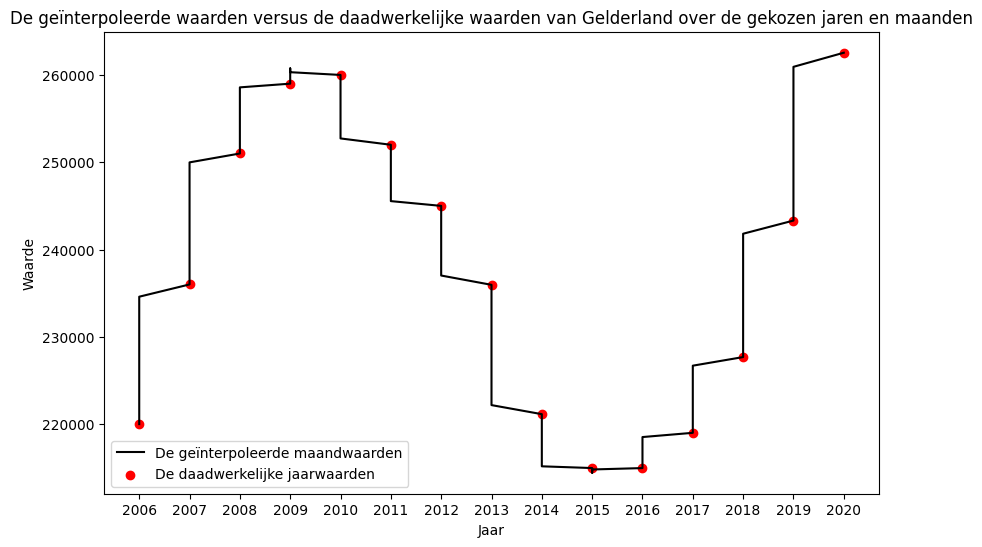

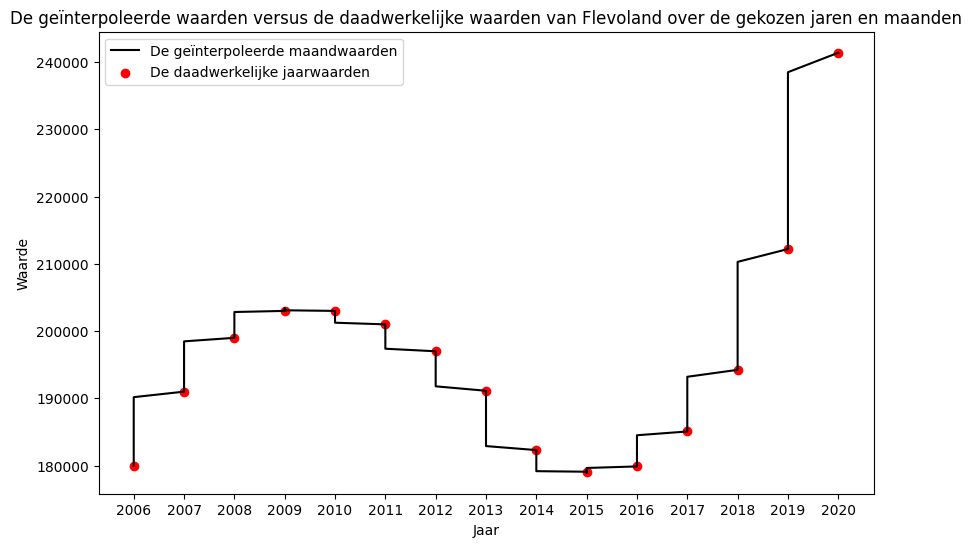

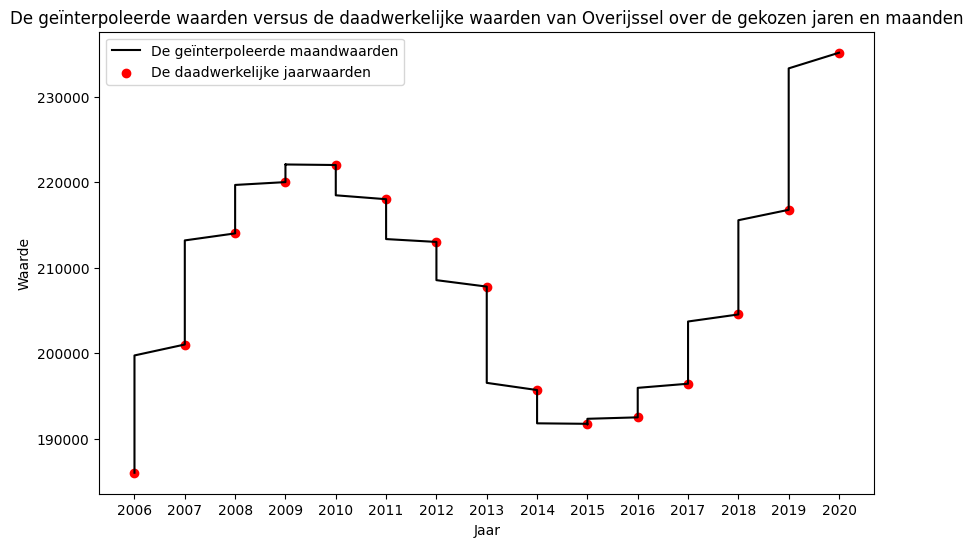

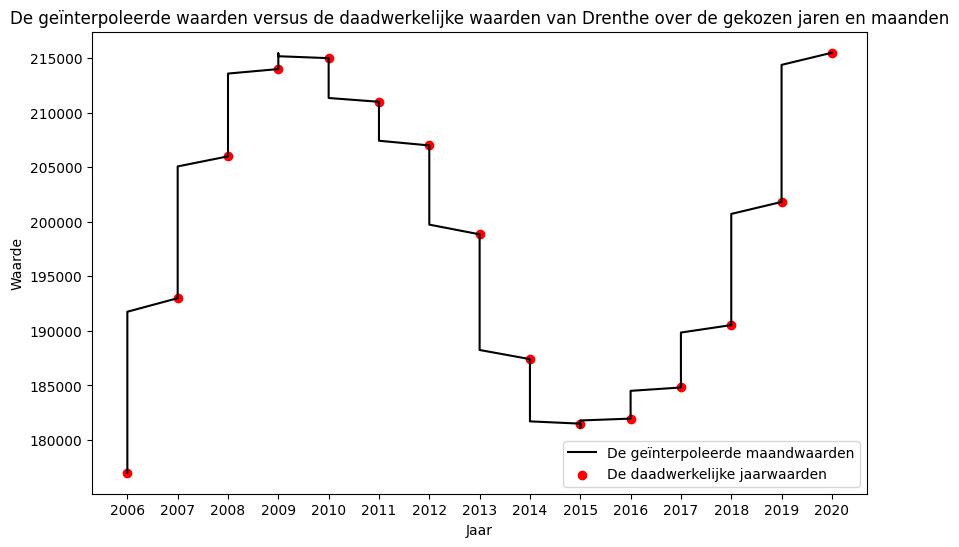

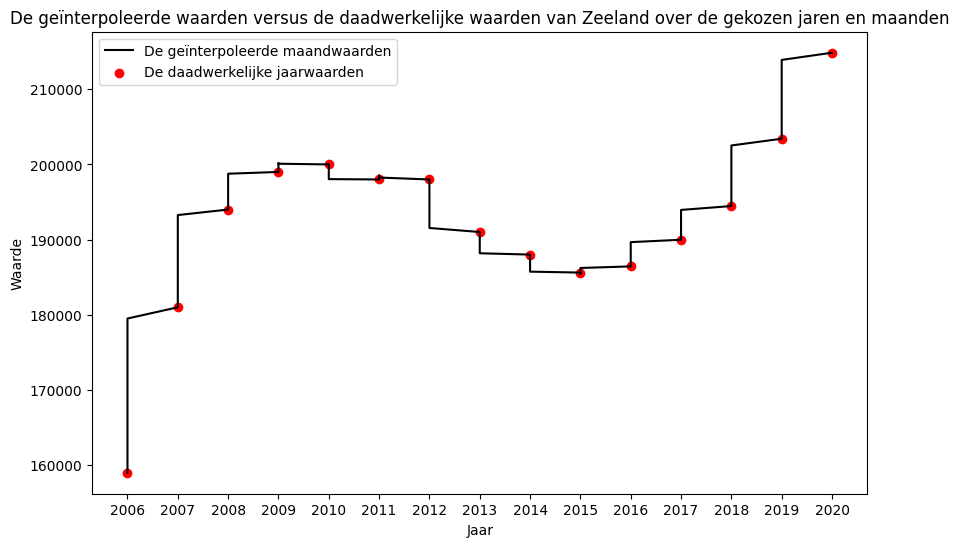

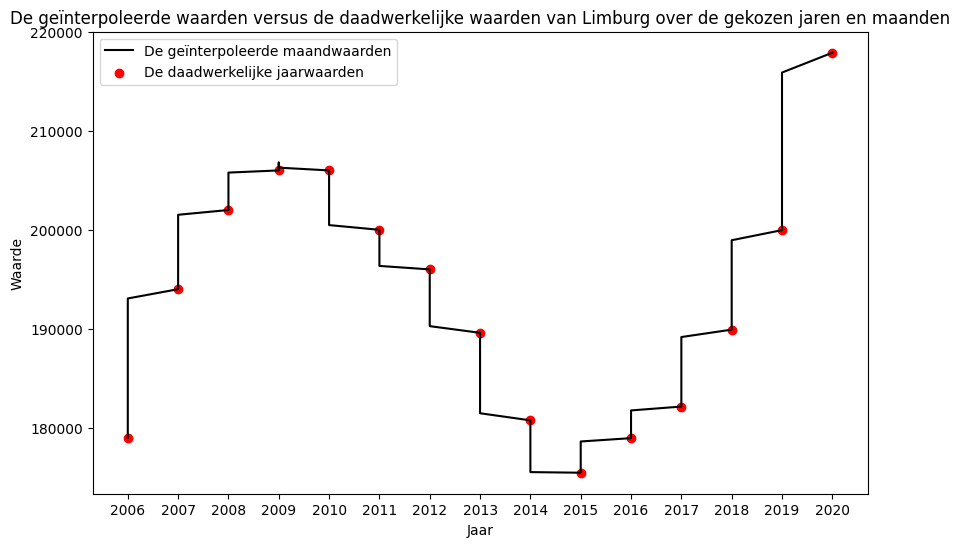

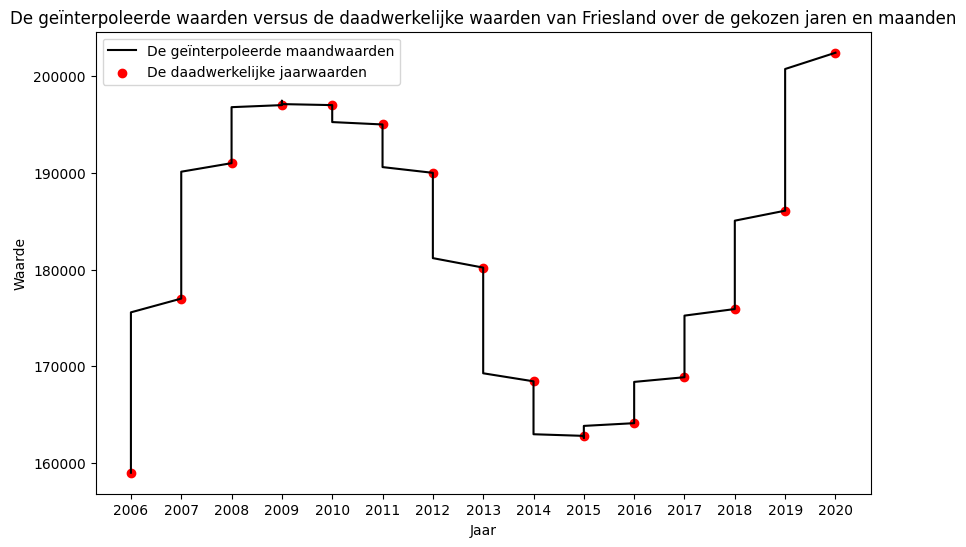

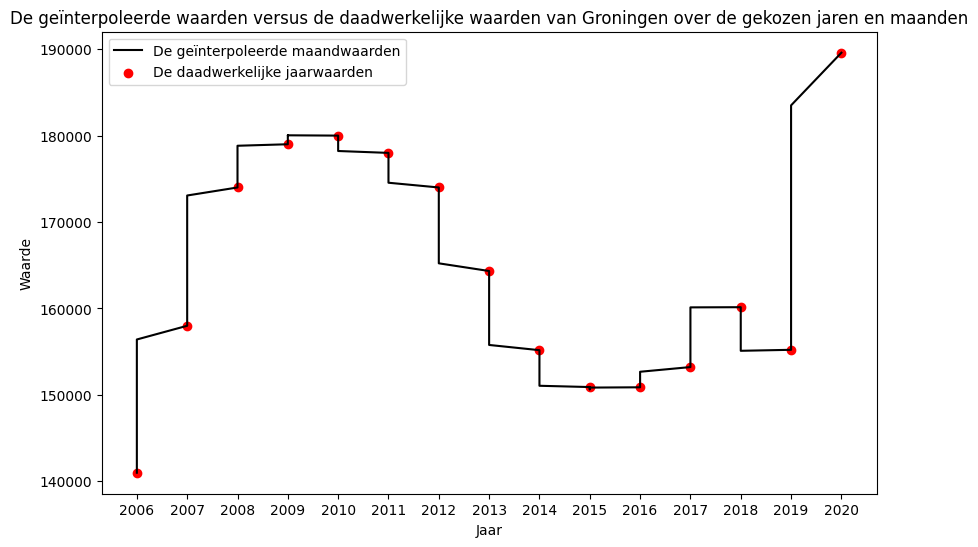

In [12]:

# Het plotten van de grafiek met zowel geinterpoleerde als de daadwerkelijke waarden. 
# Lijst van de gekozen variabelen

variabelen = ['Gemiddelde waarde eigen woning', 'Gemiddelde hypotheekschuld eigen woning', 'Particuliere huishoudens', 'Noord-Holland', 'Utrecht', 'Noord-Brabant', 'Zuid-Holland', 'Gelderland', 'Flevoland', 'Overijssel', 'Drenthe', 'Zeeland', 'Limburg', 'Friesland', 'Groningen']

# Loop door de variabelen en plot elke grafiek apart
for variabele in variabelen:
    # Maak een nieuwe figuur met aangepaste grootte
    plt.figure(figsize=(10, 6))

    # Verkrijg de x-waarden (jaar)
    x_values = main_df_after_interpolation['Jaartal']

    # Plot lijngrafiek
    plt.plot(x_values, main_df_after_interpolation[variabele], color='black', label='De geïnterpoleerde maandwaarden')
    plt.scatter(x_values, main_df_before_interpolation[variabele], color='red', label='De daadwerkelijke jaarwaarden')

    # Voeg titel en labels toe
    plt.title(f'De geïnterpoleerde waarden versus de daadwerkelijke waarden van {variabele} over de gekozen jaren en maanden', fontsize=12)
    plt.xlabel('Jaar')
    plt.ylabel('Waarde')
    
    # Voeg legenda toe
    plt.legend()

    # Toon de grafiek
    plt.show()

**3.2 Correlatiematrix**

In de hieronder weergeven correlatiematrix (figuur 1) is te zien welke variabelen het meest positief dan wel negatief correleren (r-waarde) met de woningwaarden in Gelderland. Een r-waarde onder de 0.10 wordt ‘klein’ genoemd, tussen 0.10 en 0.30 ‘klein tot gemiddeld’, tussen 0.30 en 0.50 ‘gemiddeld tot groot’ en boven de 0.50 ‘groot’. De variabelen met r-waarden lager dan 0.10 zijn buiten beschouwing gelaten in dit project. De aanname is dat hun impact op een voorspelmodel toch minimaal zal zijn.

**Kleine tot gemiddelde correlatie**

-   Tussenwoning: r = -0.25
-   Hoekwoning: r = -0.23
-   Appartement: r = -0.26
-   2-onder-1-kap: r = -0.20
-   Aantal_Verkochte_Woningen: r = -0.26
-   Particuliere Huishoudens: r = -0.24

**Gemiddelde tot grote correlatie**

-   Gemiddelde_Verkoopprijs: r = 0.33
-   CPI in %: r = 0.50
-   Vrijstaand: r = -0.30
-   Noord-Holland: r = 0.49

**Grote correlatie**

-   Gemiddelde waarde eigen woning: r = 0.62
-   Indexcijfers_Over_Verkoopontwikkeling: r = -0.60
-   Groningen: r = 0.91
-   Friesland: r = 0.98
-   Limburg: r = 0.97
-   Zeeland: r = 0.66
-   Drenthe: r = 0.98
-   Overijssel: r = 0.95
-   Flevoland: r = 0.81
-   Zuid-Holland: r = 0.82
-   Noord-Brabant: r = 0.99
-   Utrecht: r = 0.81

**Financieel_Risico_Hypotheekschuld:**

Deze variabele heeft tegen de verwachting in geen correlatie met de gemiddelde woningwaarde in de provincie Gelderland. De correlatie voor de gemiddelde hypotheekschuld eigen woning bedraagt (r: -0,017) en wordt daarmee buiten beschouwing gelaten in de verdere analyse.

**Woningwaarde_Per_Provincie:**

Uit de correlatiematrix valt op dat de provincies onderling sterk correleren met de gemiddelde woningwaarde in Gelderland. Een prijsstijging dan wel daling in de tien genoemde provincies is ook terug te zien in de gemiddelde woningwaarde. Daarom worden deze provincies meegenomen in de verdere analyse. Al deze provincies hebben een correlatie met een r-waarde van hoger dan 0.50.

**De Consumentenprijs Index (CPI) in %:**

Het CPI heeft een gemiddelde correlatie (r: 0.50) met de gemiddelde woningwaarde in de provincie Gelderland. Daarom wordt deze variabele niet meegenomen in de verdere analyse.

**De Verkoopprijzen over woningen:**

Deze variabele heeft eveneens een gemiddelde correlatie (r: 0.33) met de woningwaarde in de provincie Gelderland. Dit impliceert dat de gemiddelde verkoopprijs wel effect heeft op de gemiddelde woningwaarde in de provincie Gelderland, maar er is geen sprake van een aanzienlijke correlatie. De verkoopprijs van een woning heeft schijnbaar geen doorslaggevende rol als het gaat om het verkopen van de woningen. Om deze reden wordt deze variabele niet meegenomen in de verdere analyse.

**Het aantal verkochte woningen:**

Deze variabele heeft eveneens tegen de verwachting in een gemiddelde correlatie (r: -0.26) met de woningwaarde in Gelderland. Dit impliceert dat wanneer er meer woningen worden verkocht, de gemiddelde woningwaarde in de provincie Gelderland daalt en wanneer er geen of minder woningen worden verkocht dat de waarde de andere kant op gaat.

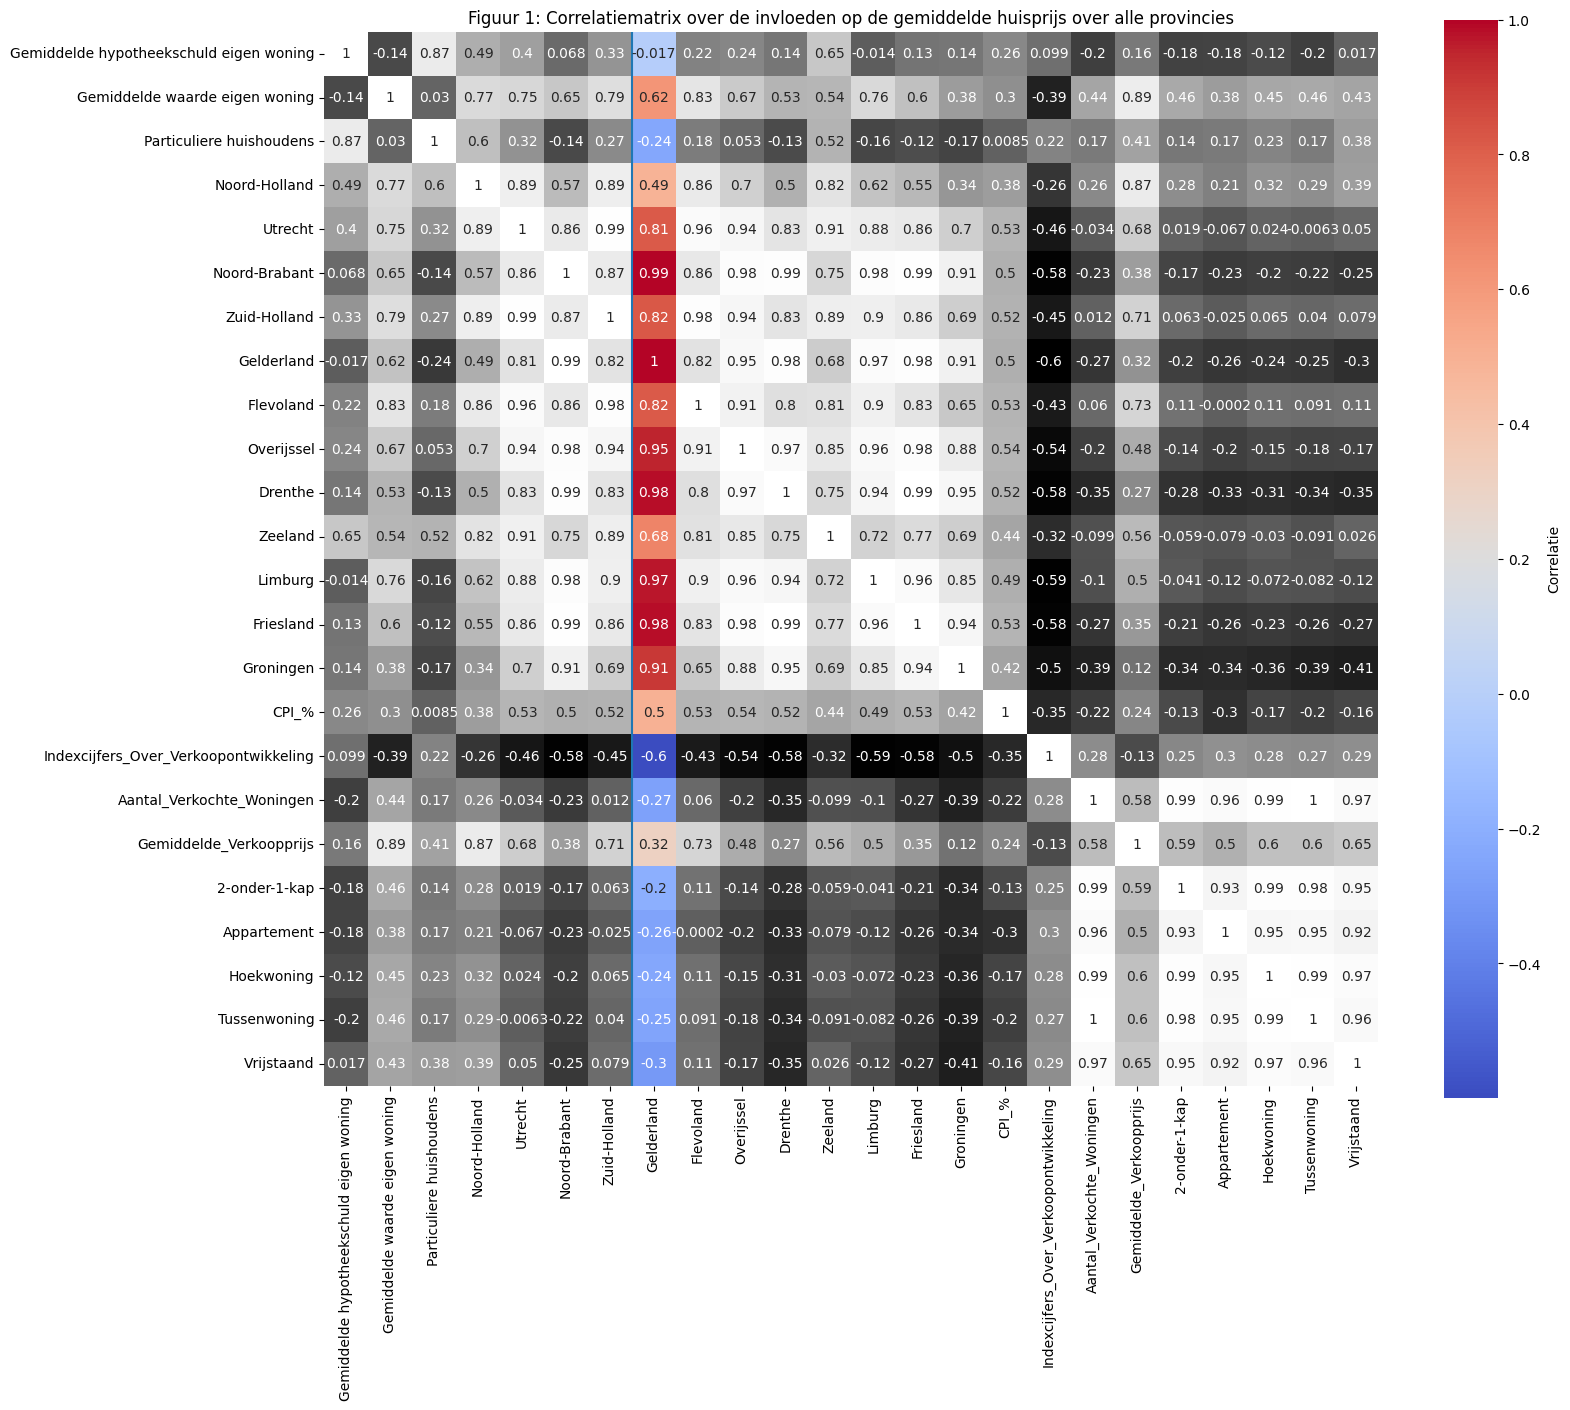

In [13]:
# Correlatiematrix
correlatiematrix = main_df_after_merged

# Dubbele kolommen worden verwijderd
columns_to_remove = ['Maand', 'Key', 'Jaartal', 'Periode (maand)']  # Namen van de kolommen die als gevolg van mergen dubbel voorkomen in de dataframe.

correlatiematrix = main_df_after_merged.drop(columns_to_remove, axis=1)

# Correlatiematrix berekenen
correlation_matrix = correlatiematrix.corr()

# Indices van de kolommen die anders moeten worden gemarkeerd, dit is in dit geval Gelderland
aangegeven_kolommen = [7]  

# Maak een masker voor de plot
mask = np.ones_like(correlation_matrix, dtype=bool)
mask[:, aangegeven_kolommen] = False

# Correlatiematrix plotten
plt.figure(figsize=(17, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, mask=mask, cbar_kws={'label': 'Correlatie', 'orientation': 'vertical', 'pad': 0.05})

# Verticale markering toevoegen aan de plot
for i in range(len(aangegeven_kolommen)):
    plt.axvline(x=aangegeven_kolommen[i])

sns.heatmap(correlation_matrix, annot=True, cmap='gray', square=True, mask=~mask, cbar=False)

plt.title('Figuur 1: Correlatiematrix over de invloeden op de gemiddelde huisprijs over alle provincies')
plt.show()


**3.3 Variance Inflation Factor**

Een hoge VIF (Variance Inflation Factor) score (figuur 2) geeft aan dat er sprake is van hoge multicollineariteit in de gegevens. Multicollineariteit verwijst naar de sterke correlatie tussen voorspellende variabelen in een regressiemodel. Wanneer multicollineariteit aanwezig is, wordt het moeilijk om de individuele effecten van de voorspellende variabelen op de afhankelijke variabele te isoleren (Tulabandu, 2021).

Interpretatie van VIF-scores: VIF = 1: Geen multicollineariteit. De variabele vertoont geen correlatie met andere voorspellende variabelen. VIF tussen de 1 en 5: Matige multicollineariteit. De variabele heeft enige correlatie met andere voorspellende variabelen, maar het is niet ernstig. VIF boven 5: Hoge multicollineariteit. De variabele vertoont een hoge correlatie met andere voorspellende variabelen en de schattingen van de coëfficiënten kunnen onbetrouwbaar zijn.

Aangezien alle waarden tussen 0 en 1.6 vallen, is er in dit geval geen reden om de variabelen te isoleren of samen te voegen. Alle groot correlerende variabelen worden meegenomen bij de modelleringstap.

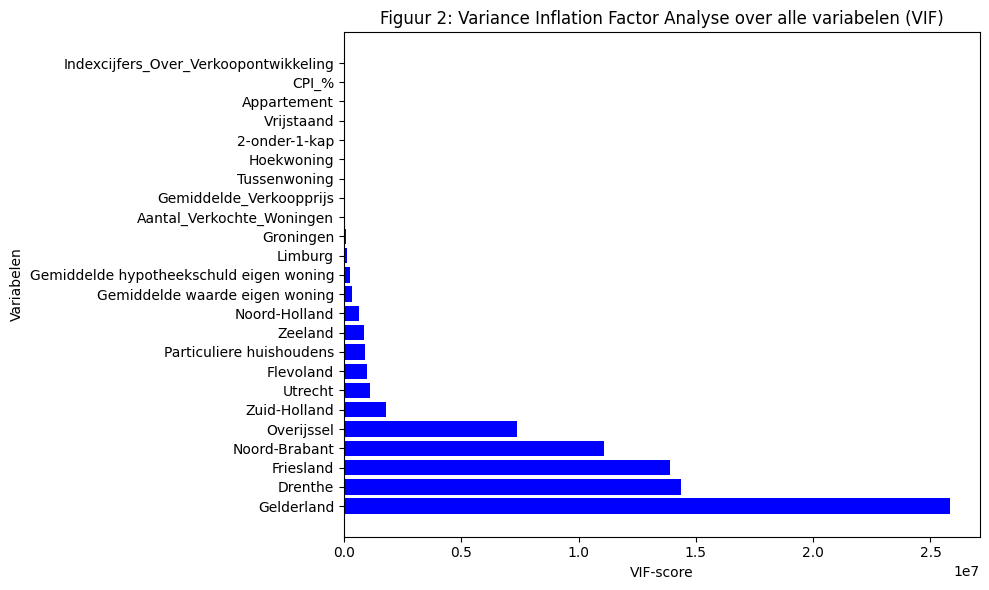

In [14]:

# Calculate VIF for all columns in the dataframe
vif = pd.DataFrame()
vif["Variabelen"] = correlatiematrix.columns
vif["VIF-score"] = [variance_inflation_factor(correlatiematrix.values, i) for i in range(len(correlatiematrix.columns))]

# Sort the dataframe by VIF values in descending order
vif_sorted = vif.sort_values(by="VIF-score", ascending=False)

# Plot VIF values
plt.figure(figsize=(10, 6))
plt.barh(vif_sorted["Variabelen"], vif_sorted["VIF-score"], color="blue")
plt.xlabel("VIF-score")
plt.ylabel("Variabelen")
plt.title("Figuur 2: Variance Inflation Factor Analyse over alle variabelen (VIF)")
plt.tight_layout()
plt.show()

**3.4 De Normalisering van de waarden**

De waarden van de variabelen onderling lopen onderling sterk uiteen. Om het werken met deze variabelen makkelijker te maken doordat de waarden beter inzichtelijk worden, zijn de waarden genormaliseerd. Voor het normaliseren is er gebruik gemaakt van de functie min-max. Dit wil zeggen dat de waarden onderverdeeld zijn in een cijfer tussen de 0 en 1. Hierdoor wordt het makkelijker om in het volgende stuk boxplotten te maken teneinde outliers van alle variabelen inzichtelijk te maken.

In [15]:
# Normaliseren van kolomwaarden
# Min-Max normalisatie toepassen
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(correlatiematrix)

# Genormaliseerde gegevens omzetten naar DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=correlatiematrix.columns)

**3.5 Het identificeren van de outliers**

In de hieronder weergeven boxplots is te zien dat de variabelen over enige uitschieters beschikken. In dit geval is er voor alle variabelen een boxplot gemaakt. Deze uitschieters worden op dit moment niet weggenomen of vervangen met een andere waarde op dit moment. De reden is dat dit gevolgen kan hebben voor de modellering. In eerste instantie wordt de modellering inclusief de outliers gemaakt, omdat het nog onbekend is of het wegnemen van de outlier ook daadwerkelijk de accuratesse van het model beïnvloedt.

In [17]:
# Het maken van de boxplots om de outliers bij de variabelen inzichtelijk te maken. 

correlation_levels = [
    {
        'title': 'Figuur 3: Interactieve Boxplot over de variabelen met klein tot gemiddelde correlatie met de gemiddelde huisprijs in Gelderland',
        'variables': ['Gelderland', 'Tussenwoning', 'Hoekwoning', 'Appartement', '2-onder-1-kap', 'Aantal_Verkochte_Woningen', 'Particuliere huishoudens']
    },
    {
        'title': 'Figuur 4: Interactieve Boxplot over de variabelen met gemiddelde tot grote correlatie met de gemiddelde huisprijs in Gelderland',
        'variables': ['Gelderland', 'Gemiddelde_Verkoopprijs', 'Vrijstaand', 'Noord-Holland']
    },
    {
        'title': 'Figuur 5: Interactieve Boxplot over de variabelen met grote correlatie met de gemiddelde huisprijs in Gelderland',
        'variables': ['Gelderland', 'Gemiddelde waarde eigen woning', 'Indexcijfers_Over_Verkoopontwikkeling', 'Groningen', 'Friesland', 'Limburg', 'Zeeland', 'Drenthe', 'Overijssel', 'Flevoland', 'Zuid-Holland', 'Noord-Brabant', 'Utrecht']
    }
]

for level in correlation_levels:
    df = pd.DataFrame({var: normalized_df[var] for var in level['variables']})
    fig = px.box(df, title=level['title'])
    fig.update_layout(showlegend=False)
    fig.show()


**3.5 Het identificeren van de outliers**

*Interactieve Lijngrafieken over de verhouding tussen de variabelen*

Bij de visualisatie van de variabelen worden enkel de grote correlaties meegenomen. Dat wil zeggen: de variabelen met een correlatie van boven de r = 0.50 met de gemiddelde woningwaarde in de provincie Gelderland. De reden hiervan is reeds in het vorige hoofdstuk aangegeven; deze variabelen maken deel uit van het voorspelmodel. Hierover meer in hoofdstuk 5. 
Grote correlatie
-   Gemiddelde waarde eigen woning: r = 0.62
-   Indexcijfers_Over_Verkoopontwikkeling : r = -0.60
-   Groningen: r = 0.94
-   Friesland: r = 0.98
-   Limburg: r = 0.97
-   Zeeland: r = 0.66
-   Drenthe: r = 0.98
-   Overijssel: r = 0.95
-   Flevoland: r = 0.81
-   Zuid-Holland: r = 0.82
-   Noord-Brabant: r = 0.99
-   Utrecht: r = 0.81

Met de interactieve visualisatie is veel mogelijk, maar geconcludeerd kan worden dat op één variabele na de overige variabelen met de gemiddelde woningwaarde in provincie Gelderland gelijklopen. Dit wil zeggen dat wanneer er een stijging of een daling in die gemiddelde woningwaarde is, dat de genoemde variabele hetzelfde stijgt of daalt. De variabele Indexcijfers_Over_Verkoopontwikkeling heeft een negatieve correlatie van r: -0.60 met de gemiddelde woningwaarde. Dit wil zeggen dat een stijging, een daling bij de andere variabele betekent en vice versa. Dat is ook goed te zien in de onderstaande twee grafieken; de waarden lopen niet gelijk.

In [18]:
# Dataframe met jaartallen en maanden

""" 
Deze functie heeft als doel om twee kolommen te maken en met eentje het jaartal en de andere de maanden. 
Deze kolommen zijn belangrijk om de dataframes laten met elkaar te kunen mergen. 

"""
def create_year_month_dataframe():
    years = list(range(2006, 2021))
    months = ['januari', 'februari', 'maart', 'april', 'mei', 'juni', 'juli', 'augustus', 'september', 'oktober', 'november', 'december']
    dates = []

    for year in years:
        for month in months:
            dates.append(f"{year} {month}")

    df = pd.DataFrame({'Datum': dates})
    return df

# Gebruik de functie om een DataFrame te maken
Jaartal_maand = create_year_month_dataframe()

# Splits het woord en het getal in aparte kolommen
Jaartal_maand[['Jaartal', 'Maand']] = Jaartal_maand['Datum'].str.split(n=1, expand=True)

# specifieke kolommen 'Jaartal' en 'Maand' worden met met loc geselecteerd
Jaartal_maand = Jaartal_maand.loc[:, ['Jaartal', 'Maand']]

# Voeg de kolom 'Jaartal_Maand' toe aan de dataframe normalized_df
normalized_df['Jaartal_Maand'] = Jaartal_maand['Jaartal'] + ' ' + Jaartal_maand['Maand']

# Maak nieuwe kolommen 'Jaar' en 'Maand' in normalized_df
normalized_df[['Jaar', 'Maand']] = normalized_df['Jaartal_Maand'].str.split(n=1, expand=True)

# dubbele kolommen worden verwijderd
columns_to_remove = ['Jaartal_Maand', 'Maand']  # Namen van de kolommen die als gevolg van mergen dubbel voorkomen in de dataframe.

normalized_df = normalized_df.drop(columns_to_remove, axis=1)

In [19]:
# Maak een lijngrafiek van alle kolommen in normalized_df
fig = px.bar(normalized_df, x='Jaar', y=normalized_df.columns)

# Instellingen voor de grafiek
fig.update_layout(
    title='Figuur 6: Een interactieve visualisatie van de genormaliseerde waarden van alle variabelen over de jaren heen',
    xaxis_title='Jaar',
    yaxis_title='Waarden',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.3,
        xanchor='right',
        x=1
    )
)

# Toon de grafiek
fig.show()

In [20]:
# Verwijder de kolom 'Jaar' uit de dataframe
normalized_df_without_year = normalized_df.drop('Jaar', axis=1)

fig = go.Figure()

for column in normalized_df_without_year.columns:
    fig.add_trace(go.Bar(x=normalized_df['Jaar'], y=normalized_df[column], name=column))

fig.update_layout(title='Figuur 7: Een interactieve visualisatie van de genormaliseerde waarden van alle variabelen over de jaren heen', xaxis_title='Jaar', yaxis_title='De genormaliseerde waarden')
fig.show()

## **4 Modelling** ##

In dit hoofdstuk komt de modeleringsstap aan bod. In deze stap wordt gekeken naar welk model of modellen zich lenen om een accurate voorspelling over de gemiddelde woningwaarde in Gelderland te doen.

**Random Forrest Regressor als het gekozen voorspelmodel**

Om de gemiddelde woningwaarde van de provincie Gelderland te voorspellen wordt aanbevolen om gebruik te maken van het Random Forrest Regressor model. Dit model heeft een tweetal technieken, te weten; ensemble en bagging.

Ensemble van beslissingsbomen: een Random Forest Regressor bestaat uit een ensemble van beslissingsbomen. Elke boom wordt afzonderlijk getraind op een subset van de trainingsdata. Bagging: bij het trainen van elke beslissingsboom wordt een subset van de trainingsdata willekeurig gekozen met herhaling. Dit proces staat bekend als bagging (bootstrap aggregating). Door gebruik te maken van verschillende subsets van data, kan de random forest een betere generalisatiecapaciteit hebben en overfitting verminderen. Juist bij een tijdreeksanalyse als deze is overfitting een risico en met de inzet van dit model wordt de kans verkleind.

Random feature selectie: bij het maken van elke splitsing in een beslissingsboom wordt slechts één subset van de beschikbare features willekeurig geselecteerd. Deze subset wordt gebruikt om de beste splitsing te bepalen. Dit helpt om correlaties tussen features te verminderen en zorgt voor diversiteit tussen de bomen. In dit geval worden de variabelen die hoog gecorreleerd zijn met de gemiddelde woningwaarde in Gelderland als feautres gebruikt. Om dit mogelijk te maken wordt de data in een train en een testdataset omgezet. De trainset wordt gebruikt om het model te trainen en de testset wordt gebruikt om het model te evalueren.

**ARIMAX als het gekozen voorspelmodel**

ARIMAX (Autoregressive Integrated Moving Average with Exogenous Variables) is een tijdreeksmodel dat de gemiddelde woningwaarde voorspelt door ARIMA-componenten te combineren met exogene variabelen. Het model is geschikt voor tijdreeksgegevens waarbij de gemiddelde woningwaarde voor de provincie Gelderland wordt beïnvloed door externe variabelen. In dat geval zijn dat de variabelen die hoog gecorreleerd zijn. Het analyseert historische gegevens en exogene variabelen om betrouwbare voorspellingen te doen en inzicht te geven in de invloed van externe factoren.

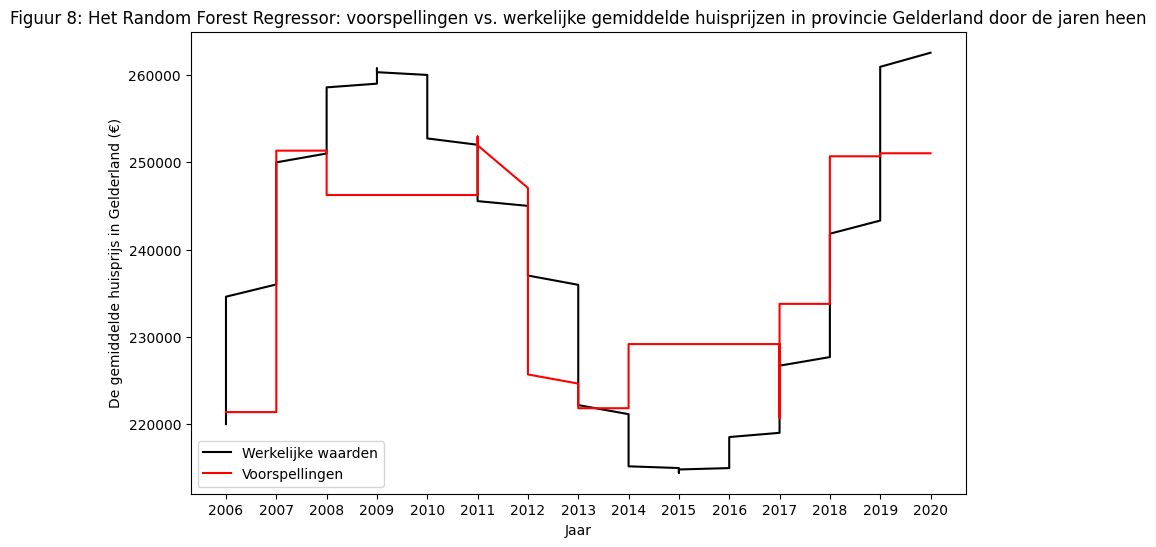

     Jaar  Werkelijke waarden  Voorspellingen  Afwijking (%)
0    2006            220000.0   221375.937041       0.625426
1    2006            221175.0   221375.937041       0.090850
2    2006            222395.0   221375.937041      -0.458222
3    2006            223654.0   221375.937041      -1.018566
4    2006            224948.0   221375.937041      -1.587951
..    ...                 ...             ...            ...
164  2019            256046.0   251026.756031      -1.960290
165  2019            257675.0   251026.756031      -2.580089
166  2019            259303.0   251026.756031      -3.191727
167  2019            260928.0   251026.756031      -3.794627
168  2020            262545.0   251026.756031      -4.387150

[169 rows x 4 columns]
Mean Squared Error: 91720388.28726478
Nauwkeurigheid: 68.05%


In [21]:
# Inlezen van de dataset
data = main_df_after_merged

# Selecteren van de features en de target variabele
X = data[['Indexcijfers_Over_Verkoopontwikkeling', 'Groningen', 'Friesland', 'Limburg', 'Zeeland', 'Drenthe', 'Overijssel', 'Flevoland', 'Zuid-Holland', 'Noord-Brabant', 'Utrecht', 'CPI_%']]
y = data['Gelderland']
jaar = data['Jaartal']

# Instantie van de Random Forest Regressor maken met regularisatieparameters
rf_regressor = RandomForestRegressor(n_estimators=90, max_depth=20, min_samples_split=20, min_samples_leaf=30, random_state=10)

# Voorspellingen maken met cross-validatie
y_pred = cross_val_predict(rf_regressor, X, y, cv=5)

# Grafiek van de voorspellingen en werkelijke waarden
plt.figure(figsize=(10, 6))
plt.plot(jaar, y, '', label='Werkelijke waarden', color='black')
plt.plot(jaar, y_pred, label='Voorspellingen', color='red')
plt.xlabel('Jaar')
plt.ylabel('De gemiddelde huisprijs in Gelderland (€)')
plt.title('Figuur 8: Het Random Forest Regressor: voorspellingen vs. werkelijke gemiddelde huisprijzen in provincie Gelderland door de jaren heen')
plt.legend()
plt.show()

# Tabel met de voorspellingen, werkelijke waarden en afwijking in percentage
afwijking_pct = ((y_pred - y) / y) * 100
results_df = pd.DataFrame({'Jaar': jaar, 'Werkelijke waarden': y, 'Voorspellingen': y_pred, 'Afwijking (%)': afwijking_pct})
print(results_df)

# Evalueren van de regressor met behulp van de Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Definieer een tolerantie voor correcte voorspellingen
tolerance = 0.05 * y.mean()  # +/- 5% van de gemiddelde waarde van y

# Bepaal de nauwkeurigheid van de voorspellingen
correct_predictions = abs(y_pred - y) <= tolerance
accuracy = sum(correct_predictions) / len(correct_predictions) * 100

print("Nauwkeurigheid: {:.2f}%".format(accuracy))


Maximum Likelihood optimization did not converge. Check mle_retvals.


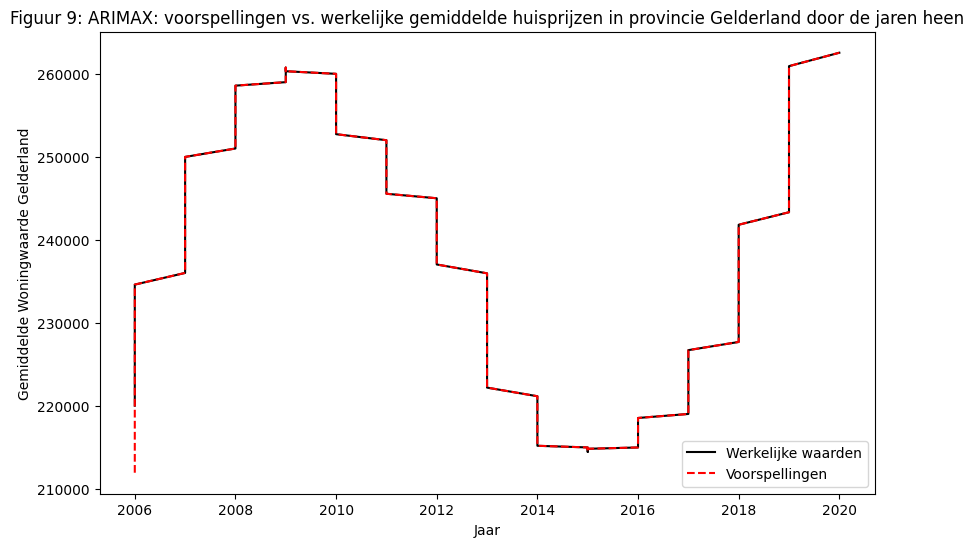

Text(0.5, 1.0, 'Figuur 10: Acurraatheid van de voorspelling')

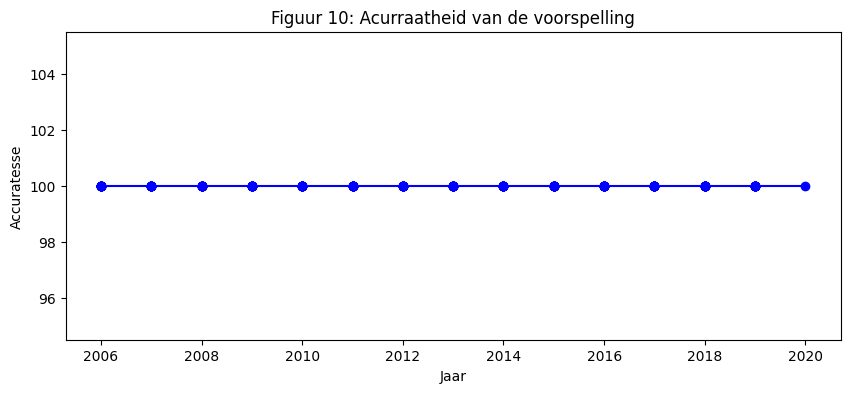

In [22]:
# Inlezen van de dataset
data = main_df_after_merged

# Convert 'Jaartal' column to integer type
data['Jaartal'] = data['Jaartal'].astype(int)

# Selecteren van de features en de target variabele
X = data[['Indexcijfers_Over_Verkoopontwikkeling', 'Groningen', 'Friesland', 'Limburg', 'Zeeland', 'Drenthe', 'Overijssel', 'Flevoland', 'Zuid-Holland', 'Noord-Brabant', 'Utrecht', 'CPI_%']]
y = data['Gelderland']
jaar = data['Jaartal']

# Filter de dataset vanaf 2006 tot en met 2020
start_year = 2006
end_year = 2020
mask = (jaar >= start_year) & (jaar <= end_year)
X_filtered = X[mask]
y_filtered = y[mask]
jaar_filtered = jaar[mask]

# ARIMAX-model maken
model = ARIMA(y_filtered, exog=X_filtered, order=(1, 1, 1))  # (p, d, q) parameters voor ARIMA

# Model trainen
try:
    model_fit = model.fit(method_kwargs={'warn_convergence': False})
    if model_fit.mle_retvals['converged']:
        print('Maximum Likelihood optimization converged.')
    else:
        print('Maximum Likelihood optimization did not converge. Check mle_retvals.')
except:
    print('Error occurred while fitting the model.')

# Voorspellingen maken voor de hele dataset
exog_forecast = X  # Gebruik de volledige exogene variabelen voor voorspelling
y_pred = model_fit.predict(start=0, end=len(X) - 1, exog=exog_forecast, dynamic=False)  # Voorspellingen inclusief toekomstige jaren

# Tabel met de nauwkeurigheid per jaar
tolerance = 0.05 * y.mean()  # Tolerantie voor correcte voorspellingen
accuracy = abs(y_pred - y) <= tolerance
accuracy_percentage = (accuracy.mean() * 100).round(2)
accuracy_df = pd.DataFrame({'Jaar': jaar, 'Nauwkeurigheid (%)': accuracy_percentage})

# Bereken de Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Grafiek van de voorspellingen en werkelijke waarden
plt.figure(figsize=(10, 6))
plt.plot(jaar, y, label='Werkelijke waarden', color='black')
plt.plot(jaar, y_pred, label='Voorspellingen', color='red', linestyle='--')
plt.xlabel('Jaar')
plt.ylabel('Gemiddelde Woningwaarde Gelderland')
plt.title('Figuur 9: ARIMAX: voorspellingen vs. werkelijke gemiddelde huisprijzen in provincie Gelderland door de jaren heen')
plt.legend()
plt.show()

# Plot de nauwkeurigheid in percentage
plt.figure(figsize=(10, 4))
plt.plot(accuracy_df['Jaar'], accuracy_df['Nauwkeurigheid (%)'], marker='o', color='blue')
plt.xlabel('Jaar')
plt.ylabel('Accuratesse')
plt.title('Figuur 10: Acurraatheid van de voorspelling')


## **5 Evaluation** ##

In dit hoofdstuk komt de evaluatie aan bod.

In hoofdstuk drie zijn twaalf variabelen behandeld waarmee de gemiddelde woningwaarde in provincie Gelderland hoog positief of negatief correleerd. Dit zijn: De gemiddelde waarde eigen woning (r = 0.62), Indexcijfers_Over_Verkoopontwikkeling (r = -0.60), Groningen (r = 0.91), Friesland (r = 0.98), Limburg (r = 0.97), Zeeland (r = 0.66), Drenthe (r = 0.98), Overijssel (r = 0.95), Flevoland (r = 0.81), Zuid-Holland (r = 0.82), Noord-Brabant (r = 0.99) en Utrecht (r = 0.81).

Verder is er in hoofdstuk vier een tweetal modellen ontwikkeld en getraind om een voorspelling te doen over de gemiddelde woningwaarde van de provincie Gelderland. Het eerste model, Random Forrest Regressor, voorspelt deze waarde voor 68.05% accuraat. Ondanks dat de nauwkeurigheid nog verder omhoog moet, geeft dit percentage toch enige houvast of de waarde stijgt danwel daalt in een maand binnen het jaar.

Het tweede model, het ARIMAX-tijdreeksanalyse, daarentegen voorspelt deze waarde voor 100% accuraat. Dit lijkt uitermate op een overfitting, daar waar nog aan gesleuteld moet worden in het model. Er is waarschijnlijk sprake van een lekkage van data in het trainen van dit model. Hierdoor ontstaat de overfitting, hoogstwaarschijnlijk. Hier moet verder mee worden gëexperimenteerd. Dit tweede model lijkt op dit moment dus nog niet werkbaar te zijn. 

Het onderzoek was begonnen met de businessvraag:
*‘’welke variabelen correleren het beste en zijn daarmee het meest effectief om maandelijks accuraat de hoogte van de gemiddelde woningwaarde in de provincie Gelderland te kunnen voorspellen middels een voorspelmodel?’’*

Met het bovenstaande is de eerder opgestelde businessvraag beantwoord. 

## **6 Deployment** ##

In het vorige hoofdstuk is te zien welke modellen er gebruikt worden om de gemiddelde woningwaarde per maand voor de provincie Gelderland te kunnen voorspellen. In dit hoofdstuk komen onder andere de stappen die het model (nog) accurater dienen te maken. Daarnaast wordt de wijze waarop dit geïmplementeerd kan worden besproken. 

Allereerst is het van belang om de hoog correlerende variabelen mee te nemen en op een complete dataset toe te passen. Dit wil zeggen dat de jaren na corona mee worden genomen. Het advies is om aan de data tot en met januari 2020 de data vanaf januari 2022 toe te voegen. Er wordt dus twee jaar data buiten beschouwing gelaten. De reden; de COVID-19 effecten worden op deze manier buiten beschouwing gelaten. Het model met de data uit deze twee jaren laten werken, kan tot een minder accurate voorspelling leiden.

Vervolgen is het dan de bedoeling om naast de hoog correlerende variabelen de gemiddeld tot laag correlerende variabelen mee te nemen in de modellen en daarmee te experimenteren of dat voor een verhoging dan wel een verlaging zorgt in accuratesse. De aanname in de eerste instantie was dat enkel de groot corrlerende variabelen een impact zouden hebben. En daarnaast speelde een korte tijd voor dit project ook een rol. Om deze reden was in de eerste instantie deze keuze gemaakt. Bovendien is het interessant om te kijken of het weghalen van de outliers ook enig effect op de accuratesse heeft.

Ten slotte kan of kunnen de gekozen voorspelmodellen in de vorm van een dashboard worden gevisualiseerd en weergeven. Dit dashboard kan in python script geschreven worden en daarna, gebruiksvriendelijk en interactief, worden gevisualiseerd. De bedoeling ervan is dat men alle stappen automatisch dient te verlopen en met één klik ververst kan worden in het dashboard. Ook moet het mogelijk zijn dat een gebruiker een x aantal maanden en/of jaren kan opgeven en dat het voorspelmodel automatisch de analyse uitvoert en tot een waarde uitkomt.

## **Literatuurlijst** ##


Amstelveens Nieuwsblad. (2023). Starters vinden het steeds lastiger om een huis te kopen. Geraadpleegd van https://www.amstelveensnieuwsblad.nl/lokaal/partnercontent/908936/starters-vinden-het-steeds-lastiger-om-een-huis-te-kopen

Business Insider. (2022). Hypotheekrente in Nederlandse provincies stijgt het hardst in Flevoland en Drenthe - en dit zijn de grootste hypotheekverschillen per provincie. Geraadpleegd op [09-06-2023], van https://www.businessinsider.nl/hypotheek-provincie-oversluiten-huizenprijs-2022/

Kadasterdata. (2023). Gemiddelde huizenprijs in Gelderland met 8,5% gestegen. Geraadpleegd op 10 juni 2023, van https://www.kadasterdata.nl/provincies/gelderland#:~:text=De%20gemiddelde%20huizenprijs%20is%20%E2%82%AC,met%208%2C5%25%20gestegen

RTL Nieuws. (2023). WOZ-waarde stijging 17 procent: Belastingen, OZB en hypotheekrente. Geraadpleegd van https://www.rtlnieuws.nl/nieuws/nederland/artikel/5368675/woz-waarde-stijging-17-procent-belastingen-ozb-hypotheekrente

Tulabandu, A. (2021). Multi-Collinearity in Regression. Towards Data Science. https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea

## **Bijlagen** ##


Link naar de betreffende dataframes: 

Centraal Bureau voor de Statistiek (CBS). (n.d.). Financieel risico hypotheekschuld; eigenwoningbezitters. Geraadpleegd op [17-06-2023], van https://www.cbs.nl/nl-nl/cijfers/detail/85162NED

Centraal Bureau voor de Statistiek. (2023). Consumentenprijzen; prijsindex 2015=100. Geraadpleegd van https://opendata.cbs.nl/statline/#/CBS/nl/dataset/83131ned/table?fromstatweb

Kadaster. (2023). Aantal woningen. Geraadpleegd op 12 juni 2023, van https://www.kadaster.nl/zakelijk/vastgoedinformatie/vastgoedcijfers/vastgoeddashboard/aantal-woningen

